In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import time
from pathlib import Path
import os
import os.path
import glob
import warnings
import numpy as np
#from tabulate import tabulate
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import string
import re
warnings.filterwarnings("ignore")


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
path = '/content/drive/Shared drives/bioenergitics_drive/Colab Notebook/Results/sg_v1_19_10_2022/Merge with Cosmed/zhr_shimmer_moxy_cosmed'

In [ ]:
def AnalyzeData(data):
    # Analyze data: statitic descriptions /correlations - for numbeic attributes
    print('Statitic Descriptions', data.describe())
    print('\n\n') #line break
    print('Correlations between attributes','\n',data.corr())
    print('\n\n')
    # Number of nans in each column
    print("Number of NaN in each column")
    for col in data.columns[data.isna().any()].tolist():
        print(col, data[col].isna().sum())
    print('\n\n')

    # Unique value in each column
    print("Unique value in each column")
    for i in data.columns:
        print(i,len(data[i].unique().tolist()))

    data.describe().to_csv("description.csv")
    data.corr().to_csv("corr.csv")

In [ ]:
list(os.listdir())

['SG_v1_Session1_Torso1_8986_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 'SG_v1_Session1_Leg_R_7C2E_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 'SG_v1_Session1_Arm_L_89AD_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 'SG_v1_Session1_Leg_L_98B5_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 '.ipynb_checkpoints',
 'SG_v1_Session1_Arm_R_8A44_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 'analysis.ipynb']

In [ ]:
files = glob.glob('*.csv')

In [ ]:
files

['SG_v1_Session1_Torso1_8986_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 'SG_v1_Session1_Leg_R_7C2E_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 'SG_v1_Session1_Arm_L_89AD_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 'SG_v1_Session1_Leg_L_98B5_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv',
 'SG_v1_Session1_Arm_R_8A44_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv']

In [ ]:
#tor = pd.read_csv(path + '/SG_v1_Session1_Torso1_8986_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv')
#df = pd.read_csv('SG_v1_Session1_Torso1_8986_Calibrated_SD.csv_zhr_shimmer_moxy_cosmed.csv')
#df.head()

In [ ]:
#list(df.columns)

In [ ]:
#df.columns

In [ ]:
#df.shape

In [ ]:
#get the data deom the df

def get_columns(df):
    df = df[['indexing','Torso1_8986_Accel_WR_X_CAL_m/(s^2)', 'Torso1_8986_Accel_WR_Y_CAL_m/(s^2)','Torso1_8986_Accel_WR_Z_CAL_m/(s^2)','VO2']]
    df.columns = ['indexing', 'Torso_Accel_X', 'Torso_Accel_Y', 'Torso_Accel_Z', 'VO2']
    return df

In [ ]:
#graph the three columns x y z from dara

def Plot_data(data):
    index_list = df['indexing'].unique().astype(int)
    for i in index_list:
            df_temp = df[df['indexing']==i]
            fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,5))
            fig.suptitle('X Y Z')
            ax1.plot(df_temp['Torso_Accel_X'])
            ax2.plot(df_temp['Torso_Accel_Y'])
            ax3.plot(df_temp['Torso_Accel_Z'])
            plt.title(i)
    plt.show()

Statitic Descriptions            indexing  Torso_Accel_X  Torso_Accel_Y  Torso_Accel_Z           VO2
count  25362.000000   25362.000000   25362.000000   25362.000000  25362.000000
mean      13.884552      -0.793403       9.750348       0.554702    417.952154
std        8.515039       0.204179       0.067112       0.211891    150.903132
min        0.000000      -2.368800       9.032418      -0.092841    187.670709
25%        7.000000      -0.867636       9.724645       0.410229    338.948511
50%       14.000000      -0.817981       9.750184       0.528842    384.368832
75%       21.000000      -0.771860       9.777281       0.696868    513.996150
max       30.000000       0.785995      10.516657       1.707280    967.882528



Correlations between attributes 
                indexing  Torso_Accel_X  Torso_Accel_Y  Torso_Accel_Z       VO2
indexing       1.000000      -0.094389      -0.030594       0.130949  0.218073
Torso_Accel_X -0.094389       1.000000       0.062923       0.339717 -0.

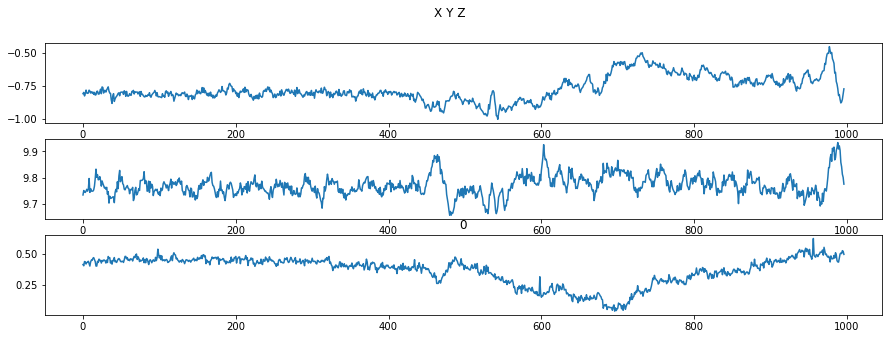

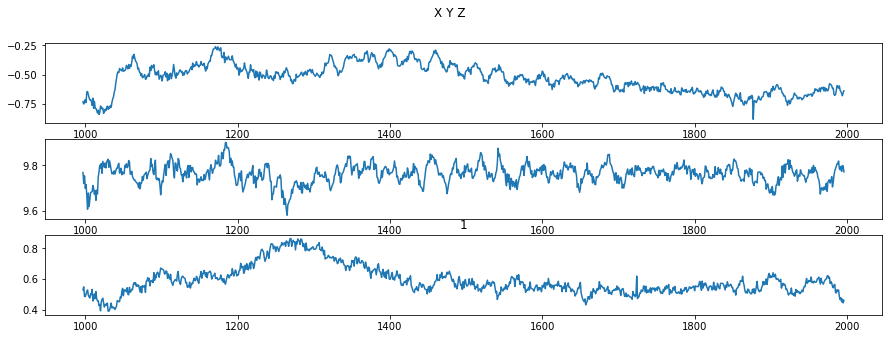

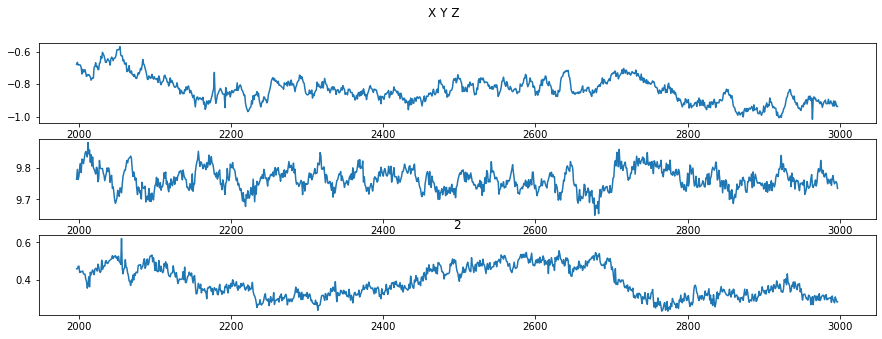

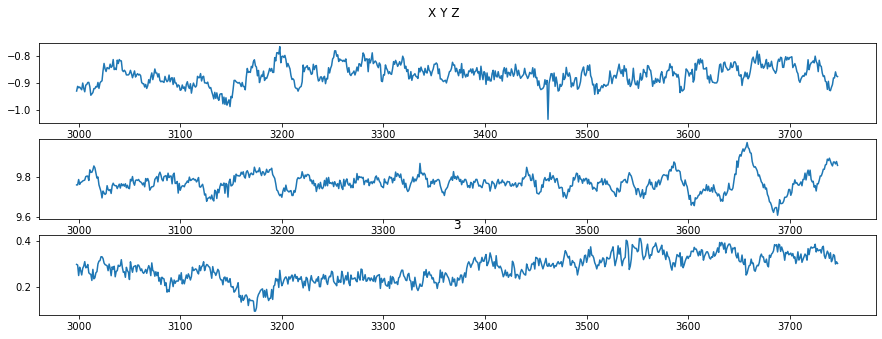

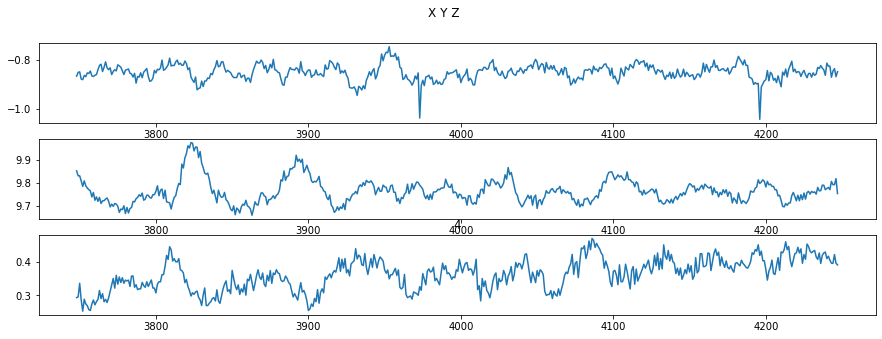

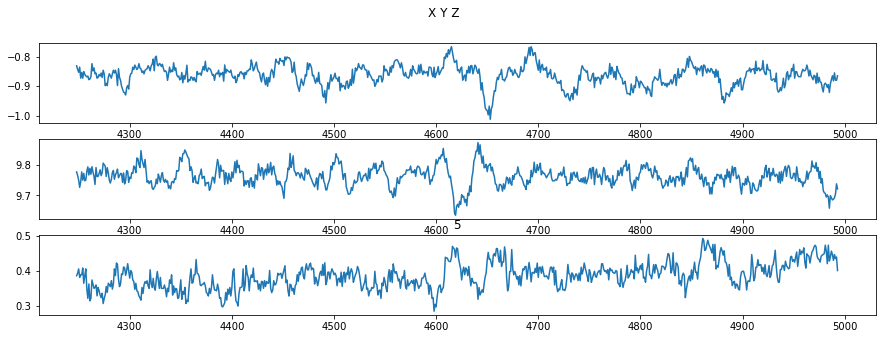

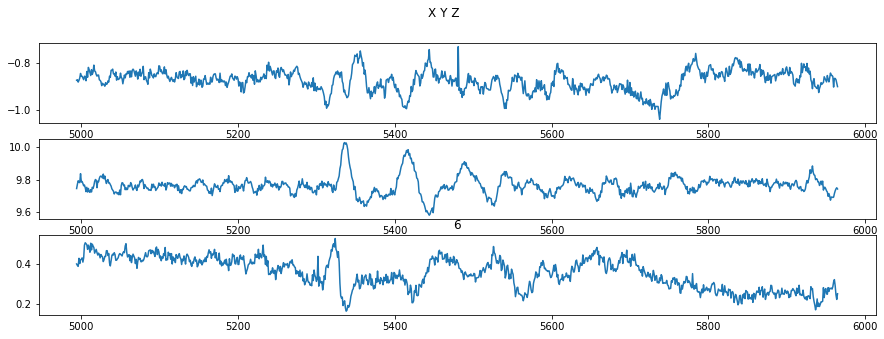

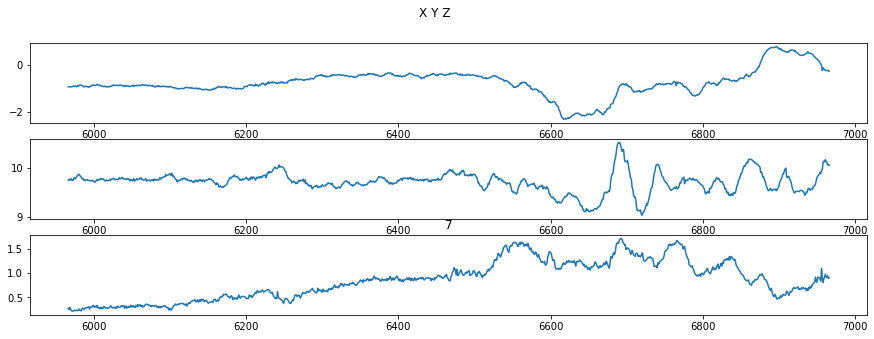

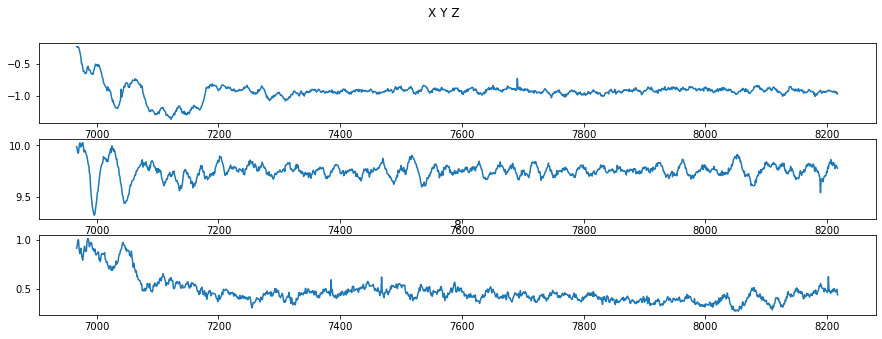

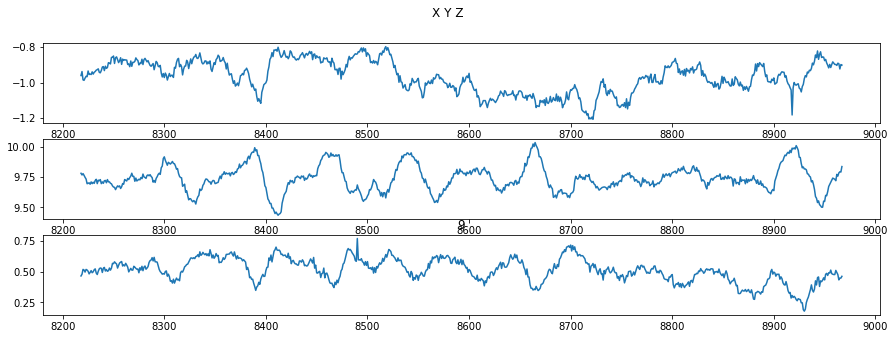

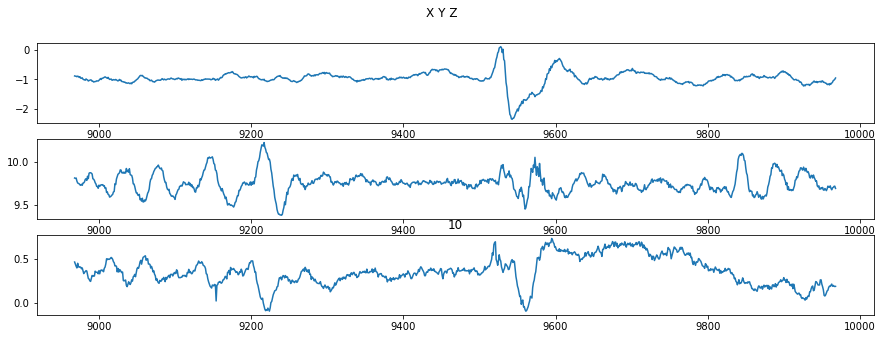

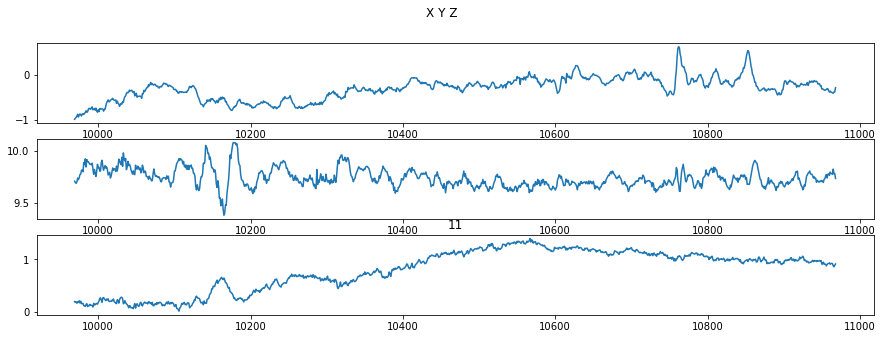

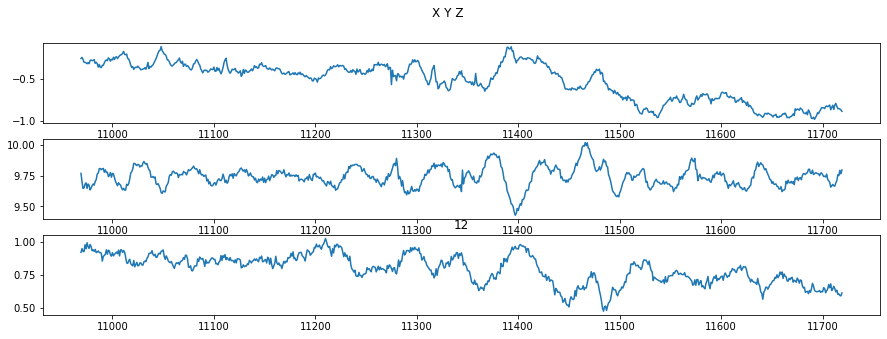

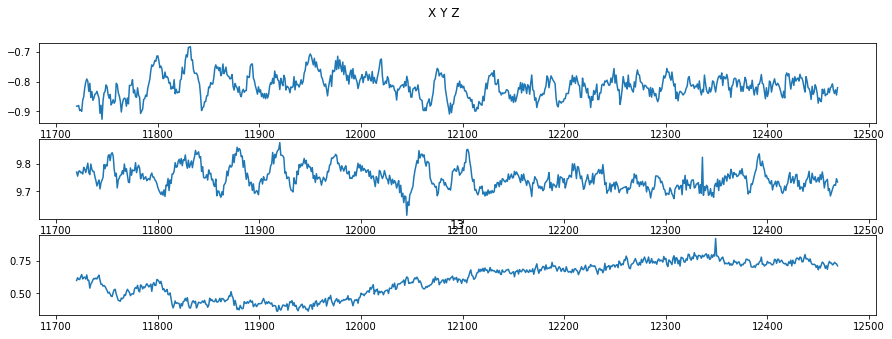

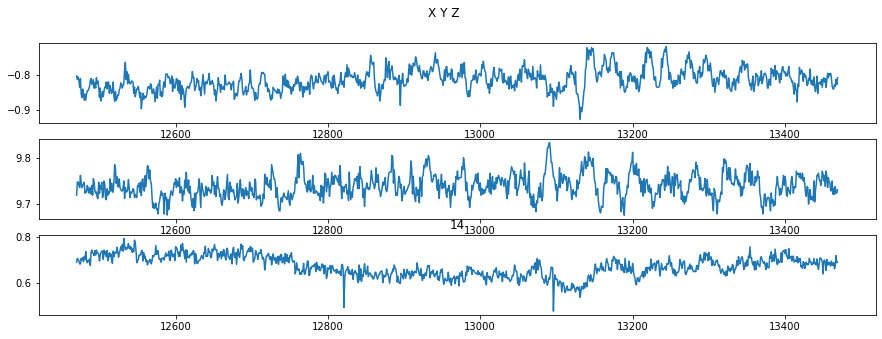

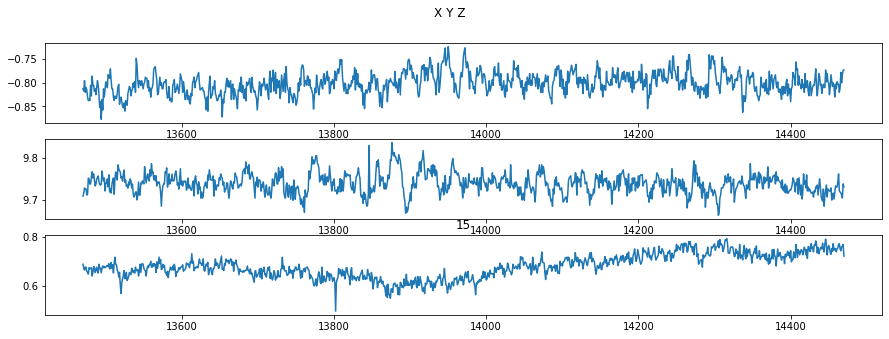

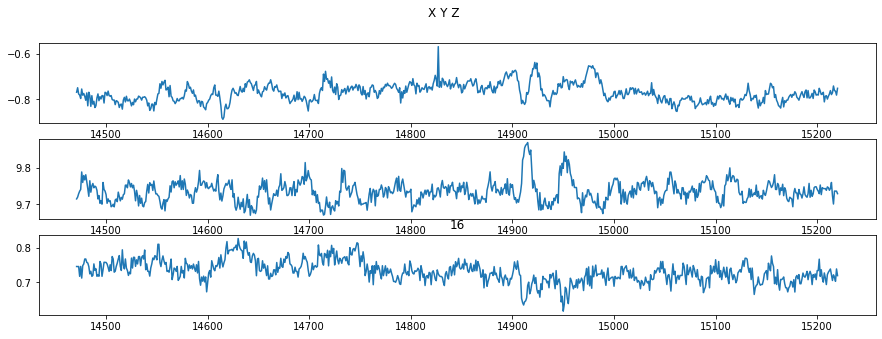

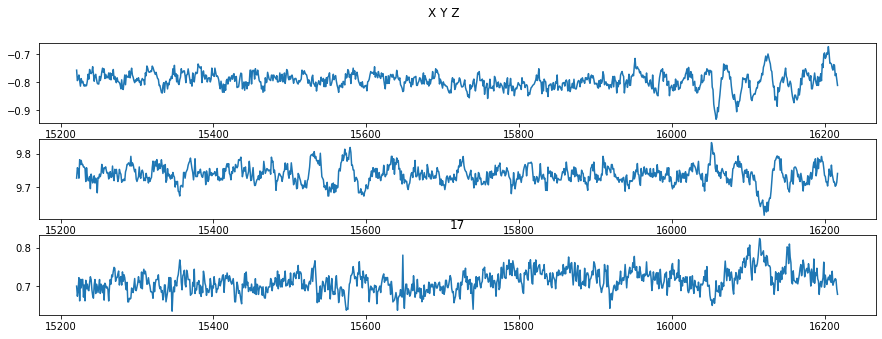

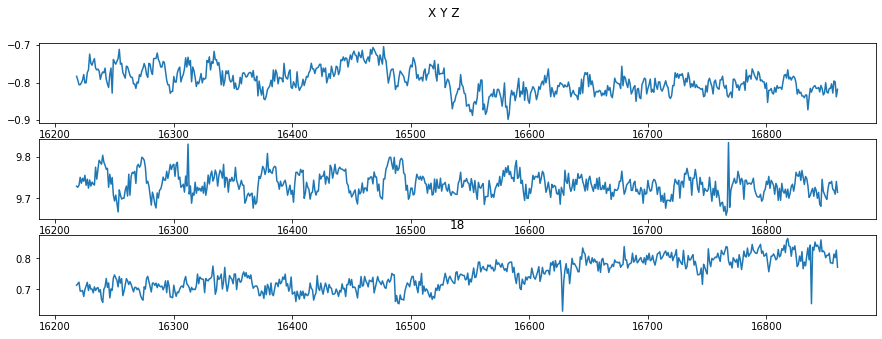

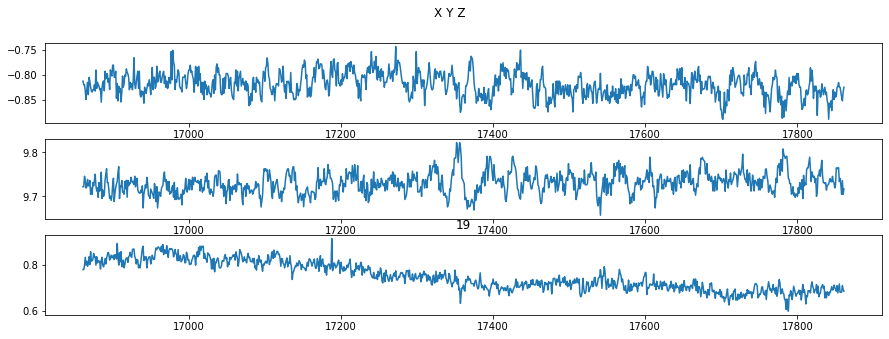

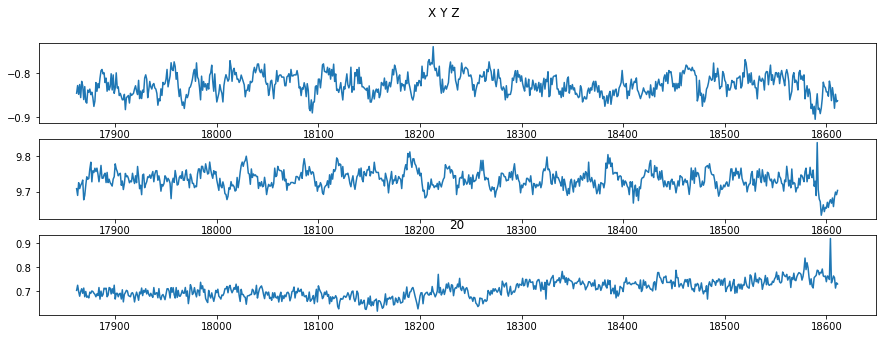

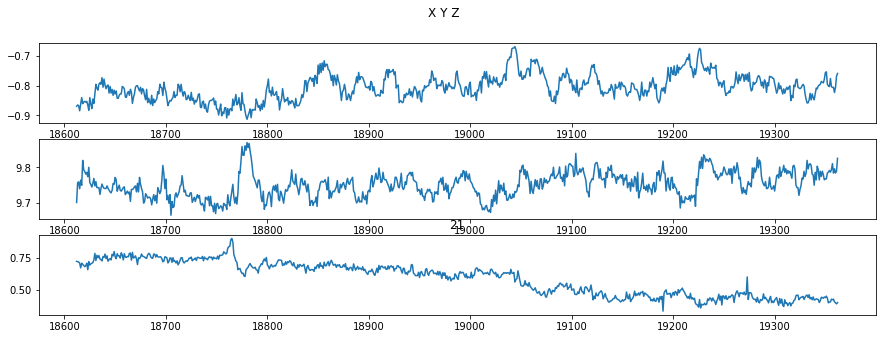

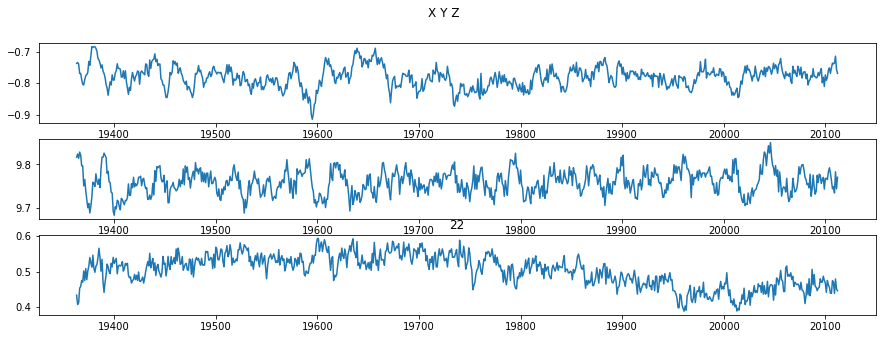

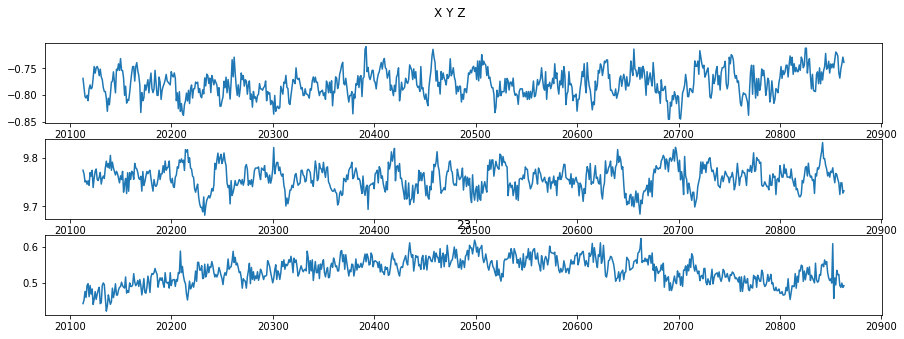

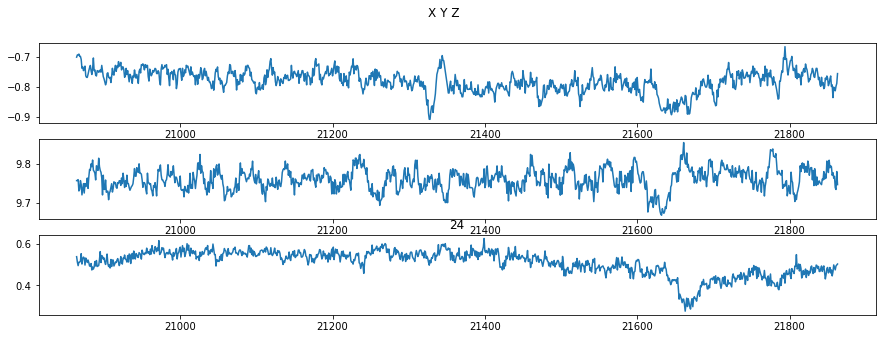

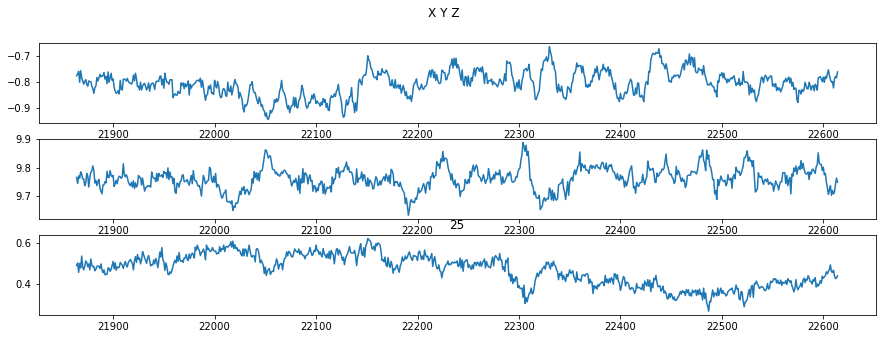

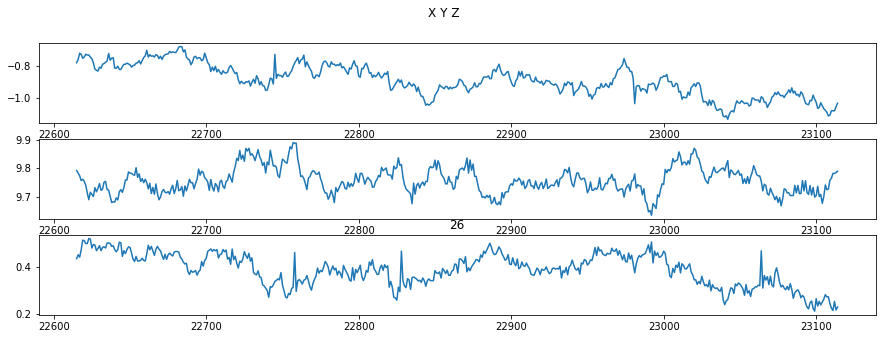

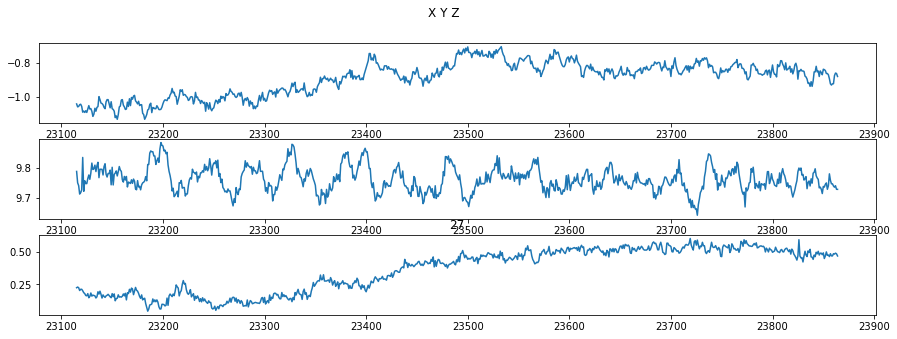

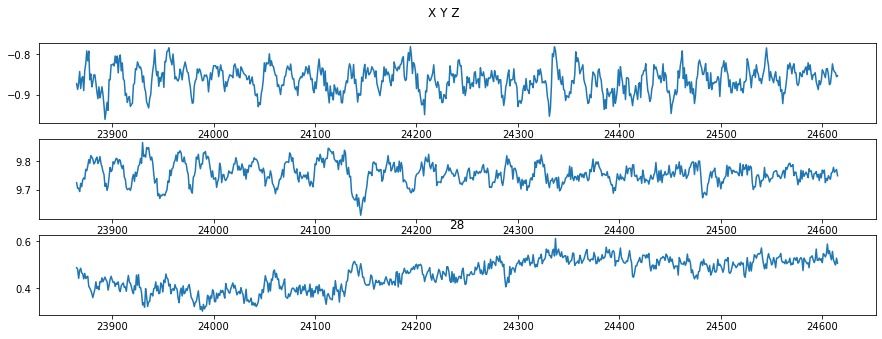

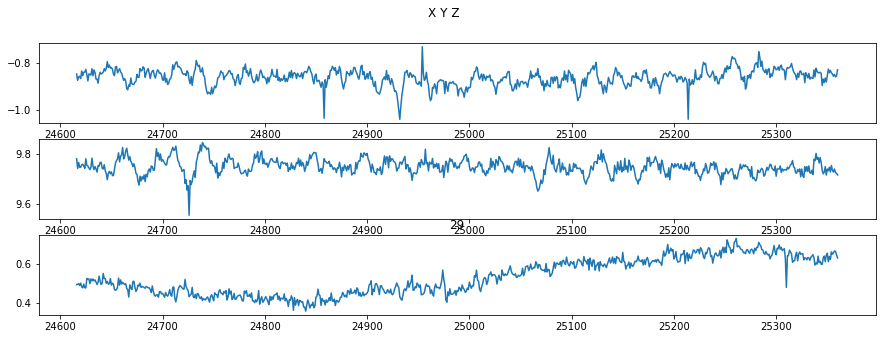

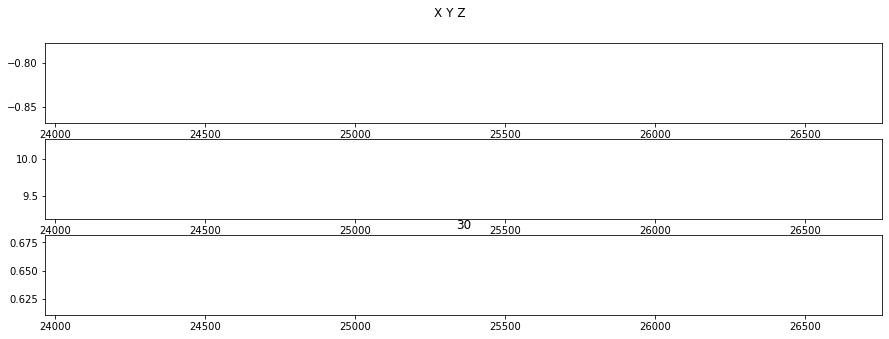

KeyError: "['Torso1_8986_Accel_WR_Z_CAL_m/(s^2)', 'Torso1_8986_Accel_WR_Y_CAL_m/(s^2)', 'Torso1_8986_Accel_WR_X_CAL_m/(s^2)'] not in index"

In [ ]:
for file in files:
    df=pd.read_csv(file)
    df=get_columns(df)
    AnalyzeData(df)
    Plot_data(df)

In [ ]:
df = get_columns(df)

In [ ]:
AnalyzeData(df)

Statitic Descriptions            indexing  Torso_Accel_X  Torso_Accel_Y  Torso_Accel_Z           VO2
count  25362.000000   25362.000000   25362.000000   25362.000000  25362.000000
mean      13.884552      -0.793403       9.750348       0.554702    417.952154
std        8.515039       0.204179       0.067112       0.211891    150.903132
min        0.000000      -2.368800       9.032418      -0.092841    187.670709
25%        7.000000      -0.867636       9.724645       0.410229    338.948511
50%       14.000000      -0.817981       9.750184       0.528842    384.368832
75%       21.000000      -0.771860       9.777281       0.696868    513.996150
max       30.000000       0.785995      10.516657       1.707280    967.882528



Correlations between attributes 
                indexing  Torso_Accel_X  Torso_Accel_Y  Torso_Accel_Z       VO2
indexing       1.000000      -0.094389      -0.030594       0.130949  0.218073
Torso_Accel_X -0.094389       1.000000       0.062923       0.339717 -0.

In [ ]:
df = df[['indexing', 'Torso1_8986_Accel_WR_X_CAL_m/(s^2)',
             'Torso1_8986_Accel_WR_Y_CAL_m/(s^2)',
             'Torso1_8986_Accel_WR_Z_CAL_m/(s^2)',
             'VO2']]

In [ ]:
df.columns = ['indexing', 'Torso_Accel_X', 'Torso_Accel_Y', 'Torso_Accel_Z', 'VO2']

In [ ]:
df.head(200)

indexing  Torso_Accel_X  Torso_Accel_Y  Torso_Accel_Z         VO2
0         0.0      -0.810566       9.733946       0.415201  356.557989
1         0.0      -0.800846       9.750840       0.405483  356.557989
2         0.0      -0.827989       9.745769       0.439428  356.557989
3         0.0      -0.810662       9.743543       0.436850  356.557989
4         0.0      -0.783518       9.748614       0.419741  356.557989
5         0.0      -0.805838       9.755589       0.431991  356.557989
6         0.0      -0.808238       9.748366       0.434420  356.557989
7         0.0      -0.805838       9.755589       0.441612  356.557989
8         0.0      -0.783998       9.796599       0.422151  356.557989
9         0.0      -0.790886       9.743741       0.402978  356.557989
10        0.0      -0.805862       9.757988       0.436802  356.557989
11        0.0      -0.795878       9.748490       0.451134  356.557989
12        0.0      -0.805766       9.748391       0.448827  356.557989
13        0.0      -0.798350       9.748465       0.465590  356.557989
14        0.0      -0.815701       9.753091       0.470574  356.557989
15        0.0      -0.801014       9.767635       0.455996  356.557989
16        0.0      -0.821077       9.796228       0.439359  356.557989
17        0.0      -0.818965       9.832242       0.403259  356.557989
18        0.0      -0.793934       9.801299       0.403008  356.557989
19        0.0      -0.791558       9.810921       0.441469  356.557989
20        0.0      -0.813613       9.791504       0.432069  356.557989
21        0.0      -0.813637       9.793903       0.458527  356.557989
22        0.0      -0.796430       9.803673       0.446329  356.557989
23        0.0      -0.776510       9.789475       0.448535  356.557989
24        0.0      -0.810902       9.767536       0.427231  356.557989
25        0.0      -0.759183       9.787249       0.448362  356.557989
26        0.0      -0.764031       9.777603       0.441194  356.557989
27        0.0      -0.805982       9.769985       0.451235  356.557989
28        0.0      -0.786110       9.760585       0.451036  356.557989
29        0.0      -0.786134       9.762984       0.443820  356.557989
30        0.0      -0.798422       9.755663       0.427106  356.557989
31        0.0      -0.781190       9.763034       0.450987  356.557989
32        0.0      -0.771039       9.736741       0.431643  356.557989
33        0.0      -0.758775       9.746461       0.479626  356.557989
34        0.0      -0.790478       9.702953       0.467917  356.557989
35        0.0      -0.805574       9.729197       0.470473  356.557989
36        0.0      -0.807974       9.721974       0.427202  356.557989
37        0.0      -0.857413       9.721480       0.444533  356.557989
38        0.0      -0.884628       9.723607       0.418347  356.557989
39        0.0      -0.827797       9.726575       0.449048  356.557989
40        0.0      -0.810494       9.726748       0.446469  356.557989
41        0.0      -0.869604       9.704561       0.471113  356.557989
42        0.0      -0.850213       9.743148       0.437245  356.557989
43        0.0      -0.837973       9.755268       0.441934  356.557989
44        0.0      -0.830461       9.745745       0.432237  356.557989
45        0.0      -0.820957       9.784232       0.446574  356.557989
46        0.0      -0.808334       9.757963       0.458474  356.557989
47        0.0      -0.803870       9.805998       0.463240  356.557989
48        0.0      -0.826333       9.827370       0.456249  356.557989
49        0.0      -0.801182       9.784430       0.441566  356.557989
50        0.0      -0.798830       9.796451       0.436732  356.557989
51        0.0      -0.798902       9.803649       0.441543  356.557989
52        0.0      -0.798638       9.777257       0.441540  356.557989
53        0.0      -0.815893       9.772285       0.432092  356.557989
54        0.0      -0.788534       9.755762       0.453466  356.557989
55        0.0      -0.795926 

In [ ]:
df.corr()

indexing  Torso_Accel_X  Torso_Accel_Y  Torso_Accel_Z       VO2
indexing       1.000000      -0.094389      -0.030594       0.130949  0.218073
Torso_Accel_X -0.094389       1.000000       0.062923       0.339717 -0.225371
Torso_Accel_Y -0.030594       0.062923       1.000000      -0.324531 -0.007657
Torso_Accel_Z  0.130949       0.339717      -0.324531       1.000000 -0.048429
VO2            0.218073      -0.225371      -0.007657      -0.048429  1.000000

In [ ]:
df.describe()

indexing  Torso_Accel_X  Torso_Accel_Y  Torso_Accel_Z           VO2
count  25362.000000   25362.000000   25362.000000   25362.000000  25362.000000
mean      13.884552      -0.793403       9.750348       0.554702    417.952154
std        8.515039       0.204179       0.067112       0.211891    150.903132
min        0.000000      -2.368800       9.032418      -0.092841    187.670709
25%        7.000000      -0.867636       9.724645       0.410229    338.948511
50%       14.000000      -0.817981       9.750184       0.528842    384.368832
75%       21.000000      -0.771860       9.777281       0.696868    513.996150
max       30.000000       0.785995      10.516657       1.707280    967.882528

In [ ]:
df['indexing'].unique().astype(int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

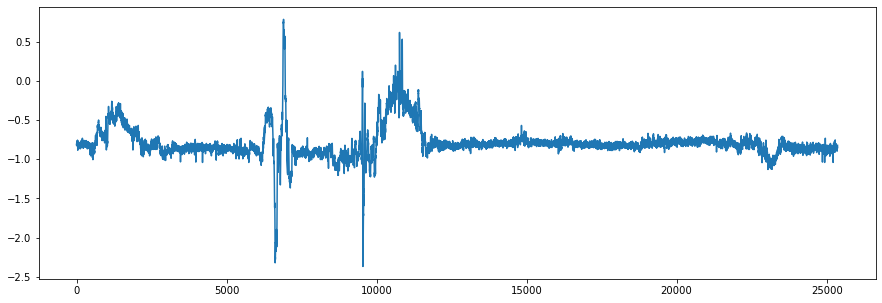

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Torso_Accel_X'])

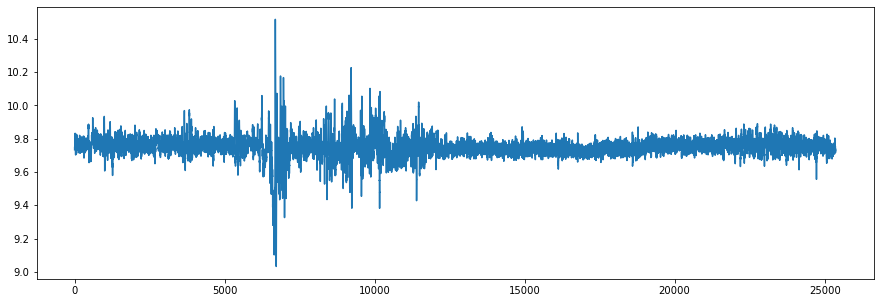

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Torso_Accel_Y'])

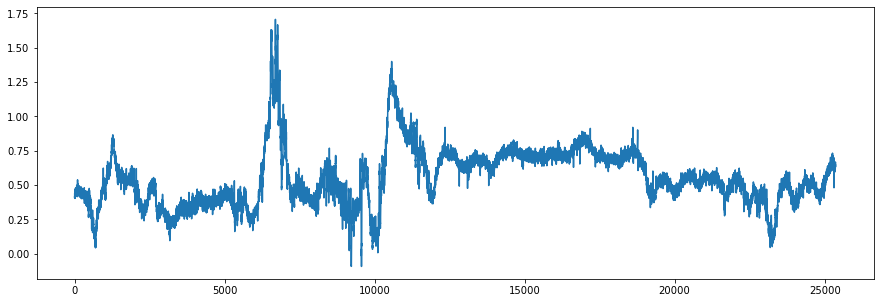

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Torso_Accel_Z'])

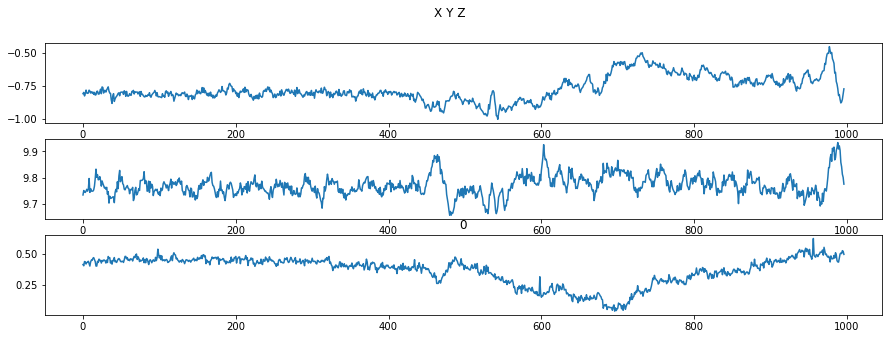

In [ ]:
for i in index_list:
    df_temp = df[df['indexing']==i]
    fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,5))
    fig.suptitle('X Y Z')
    ax1.plot(df_temp['Torso_Accel_X'])
    ax2.plot(df_temp['Torso_Accel_Y'])
    ax3.plot(df_temp['Torso_Accel_Z'])
    plt.title(i)
    break

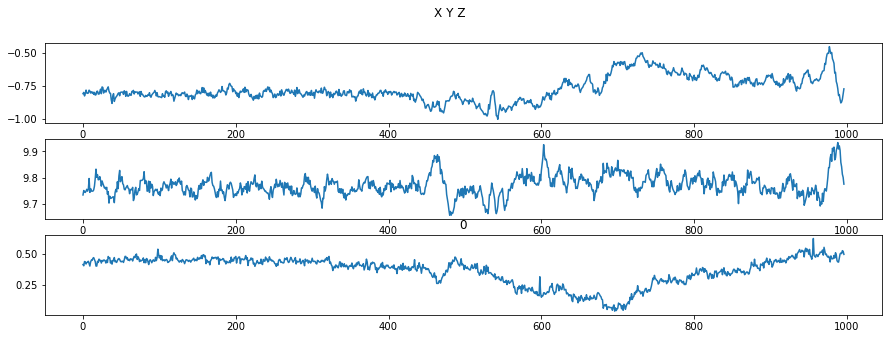

In [ ]:
for i in index_list:
    df_temp = df[df['indexing']==i]
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,5))
    fig.suptitle('X Y Z')
    ax1.plot(df_temp['Torso_Accel_X'])
    ax2.plot(df_temp['Torso_Accel_Y'])
    ax3.plot(df_temp['Torso_Accel_Z'])
    plt.title(i)
    break

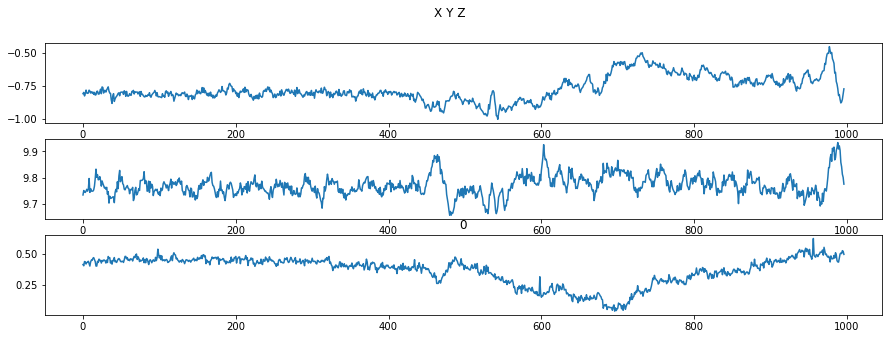

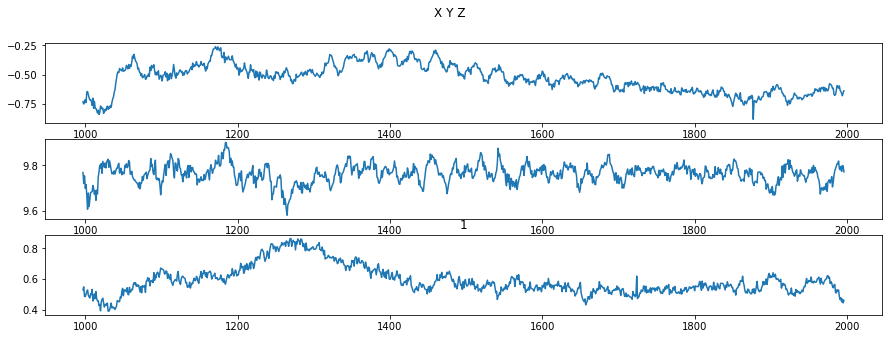

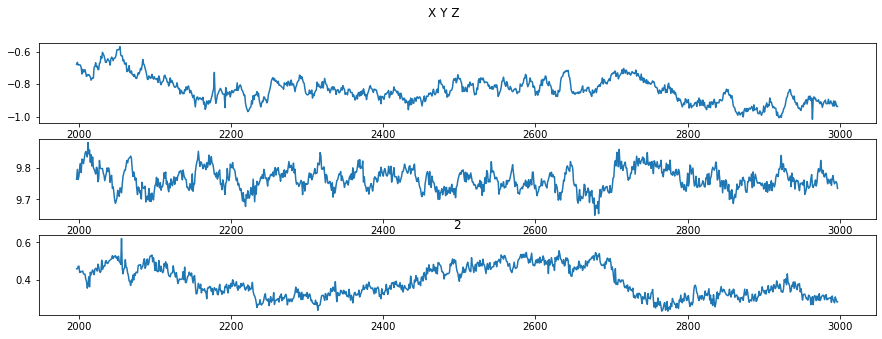

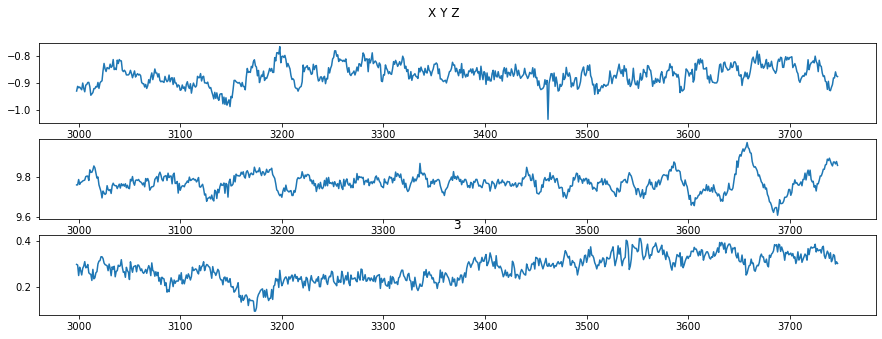

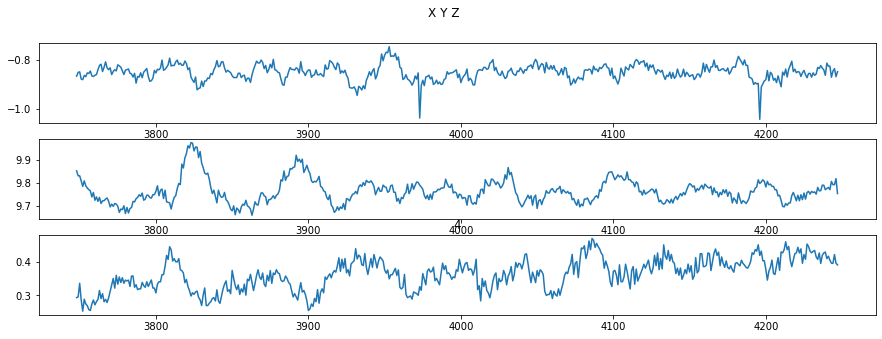

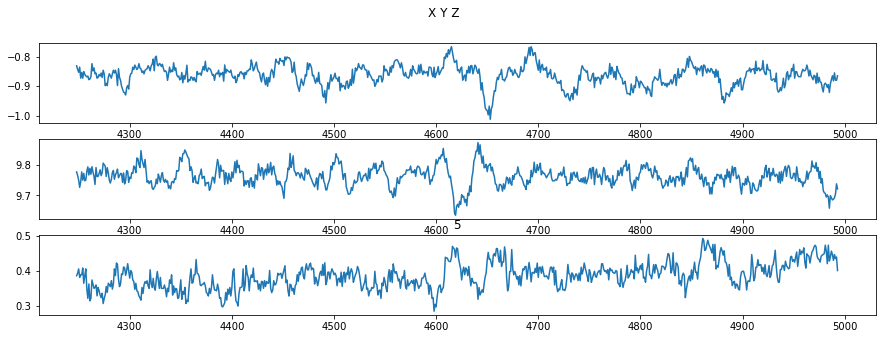

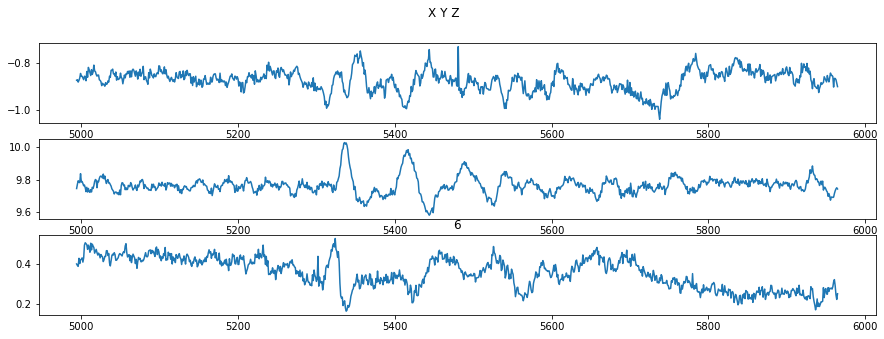

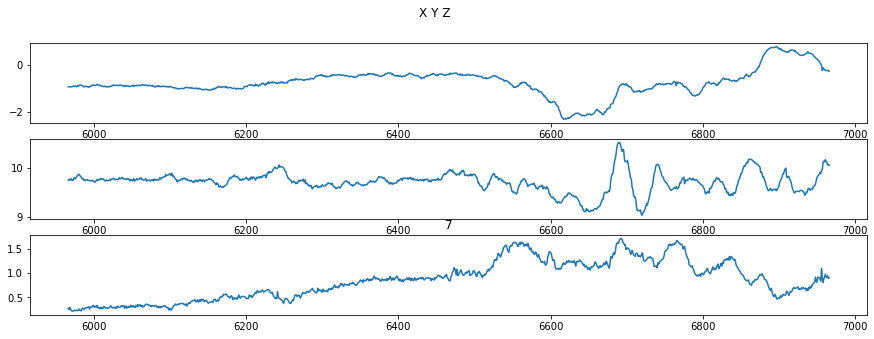

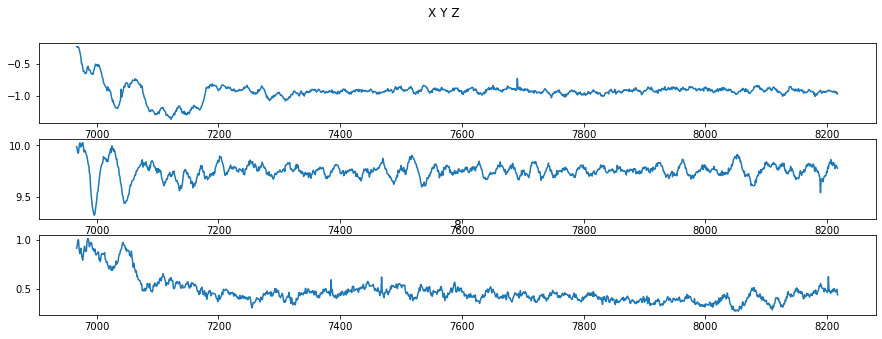

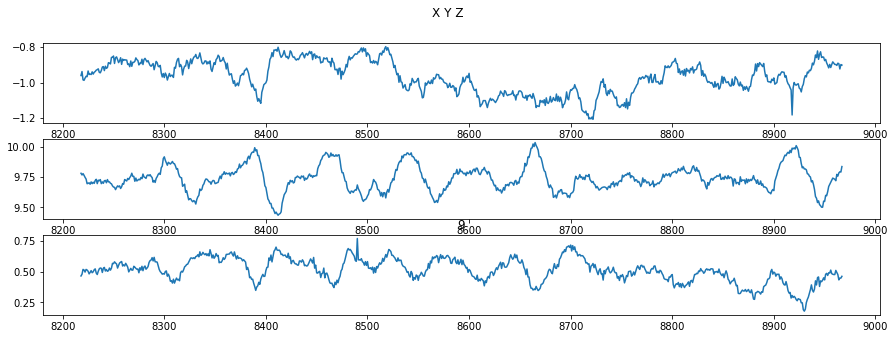

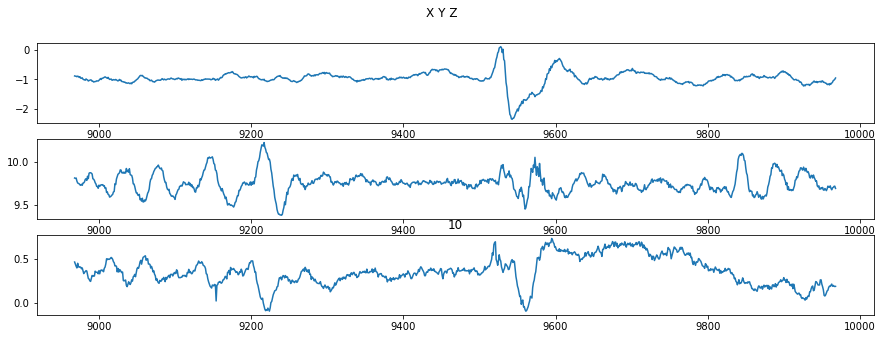

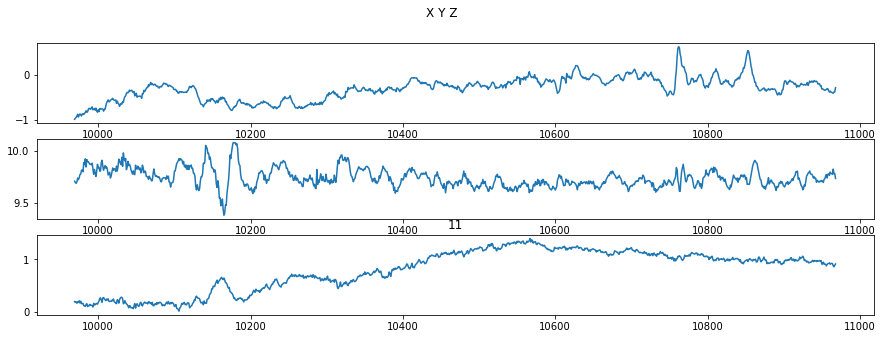

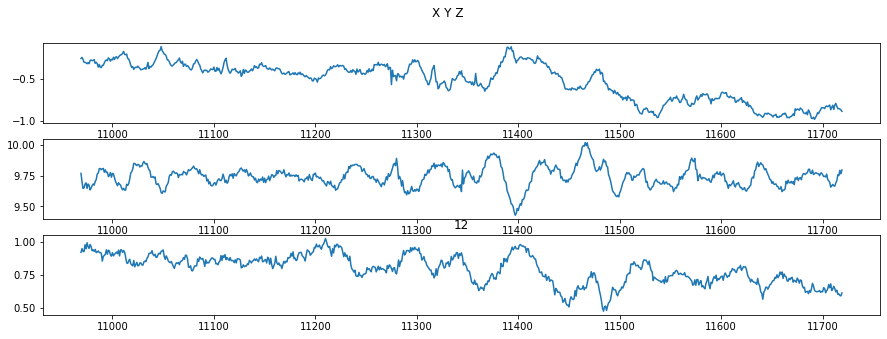

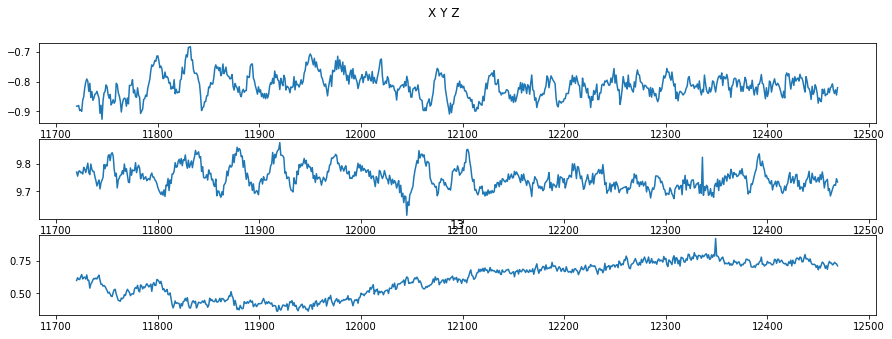

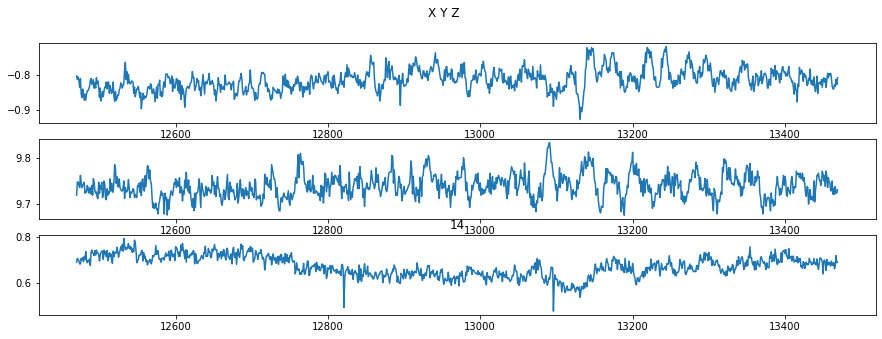

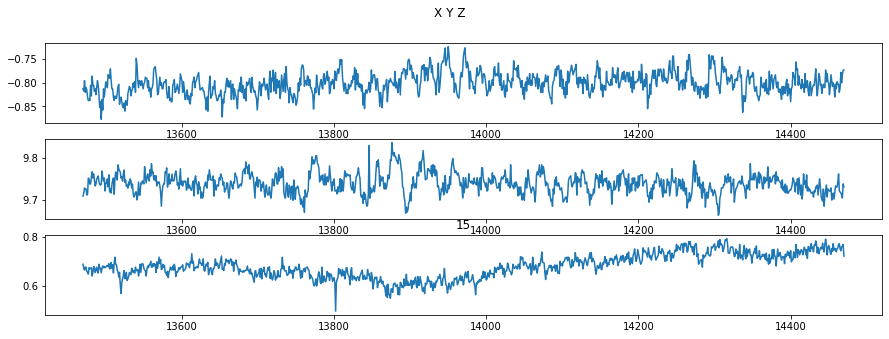

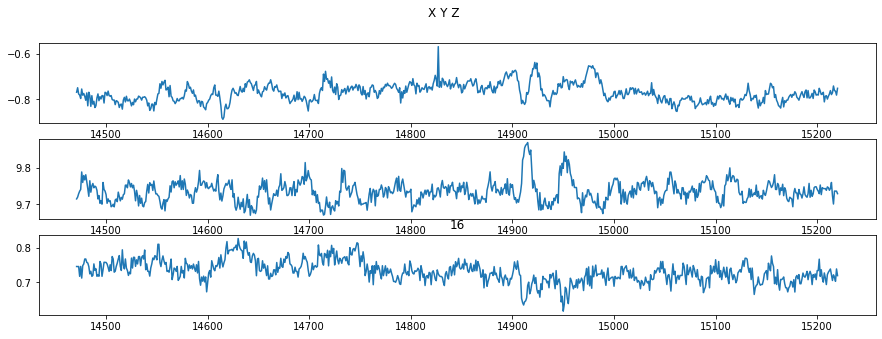

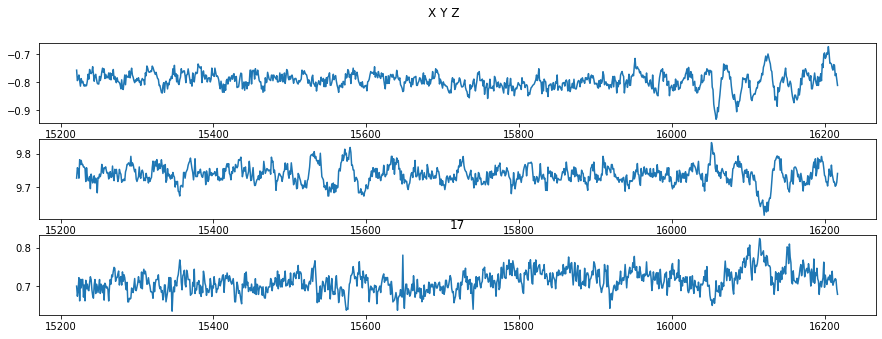

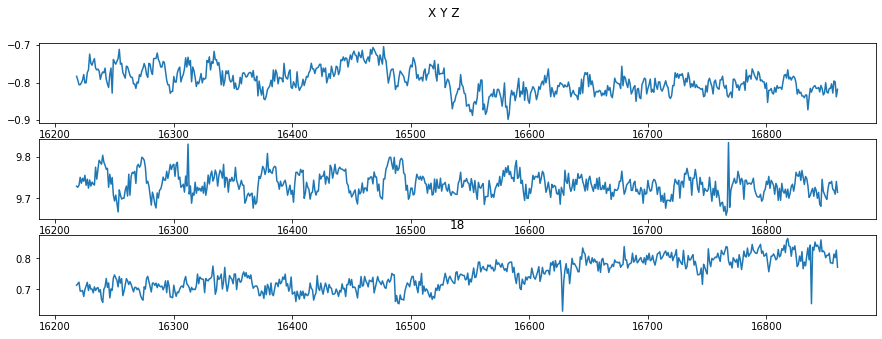

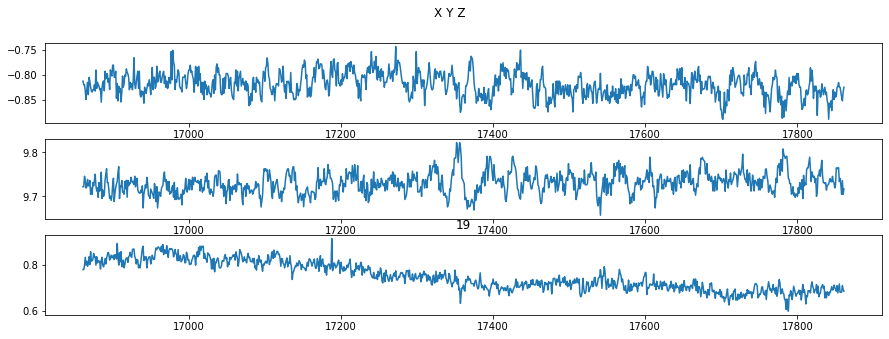

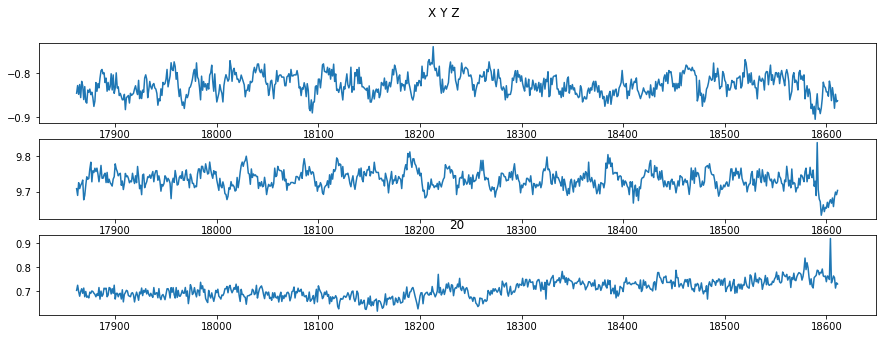

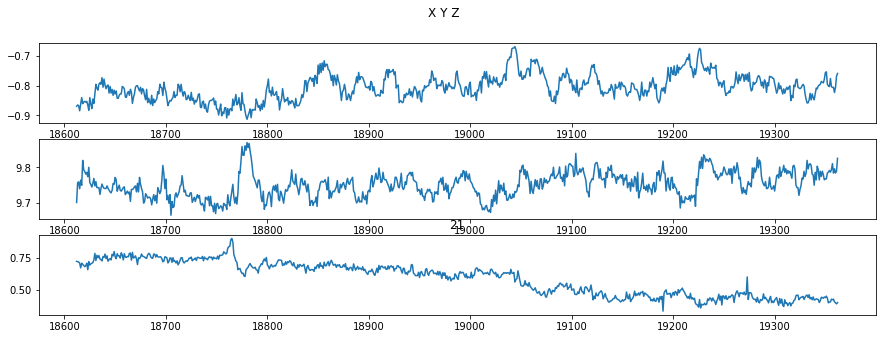

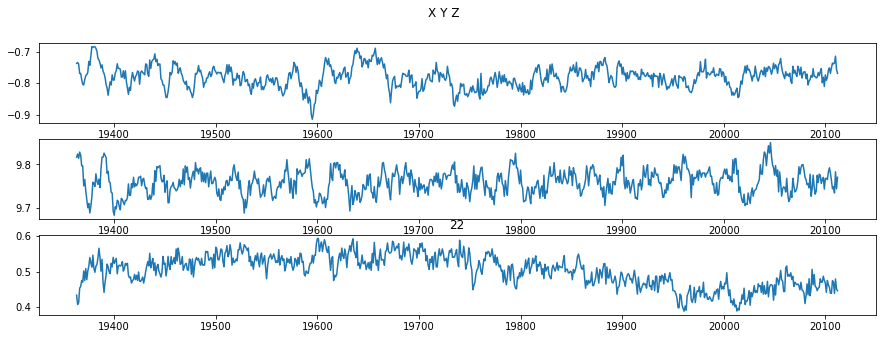

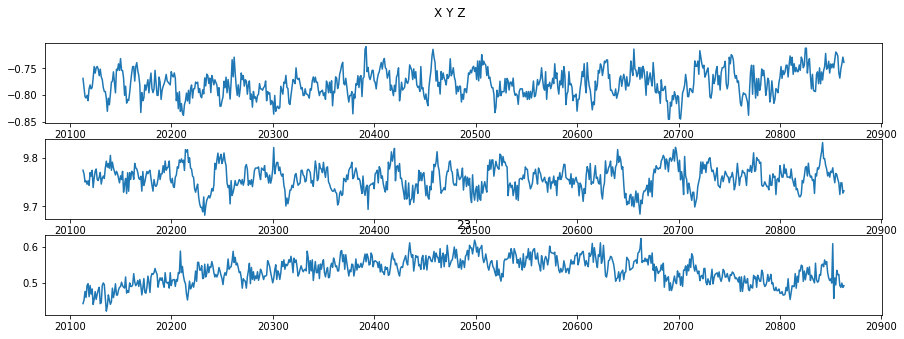

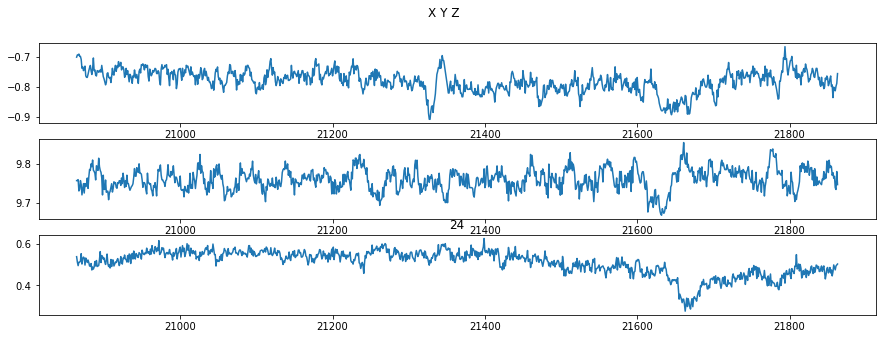

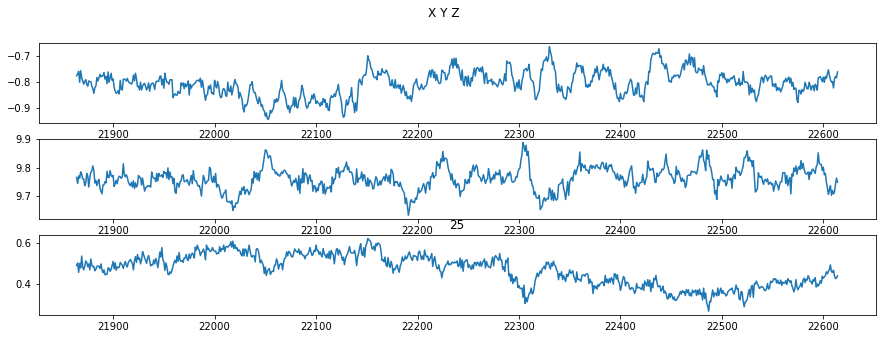

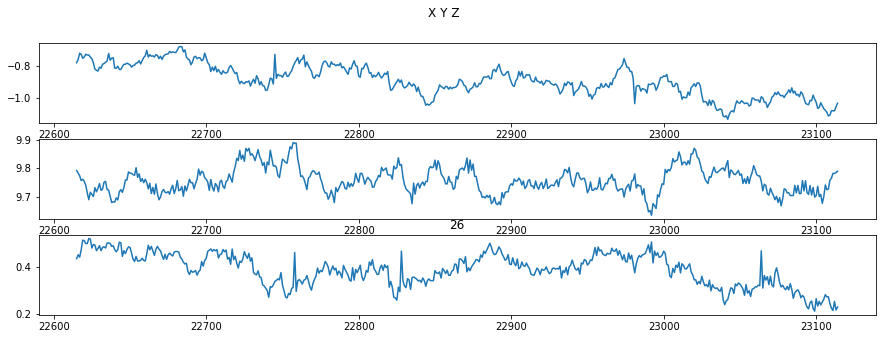

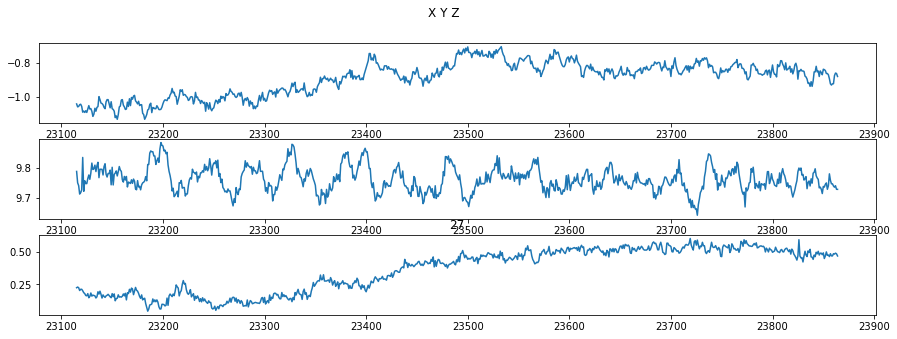

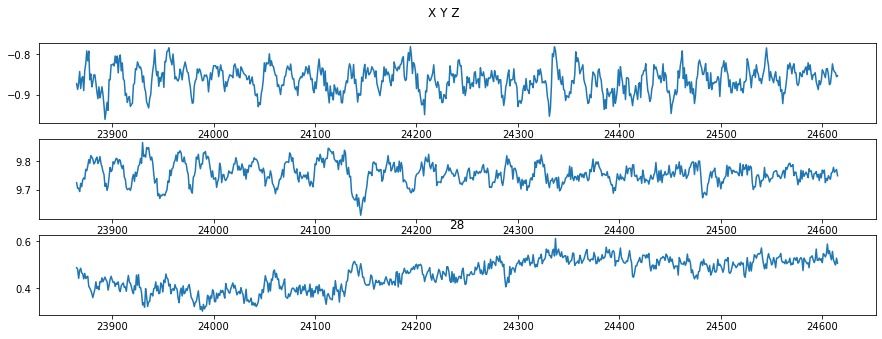

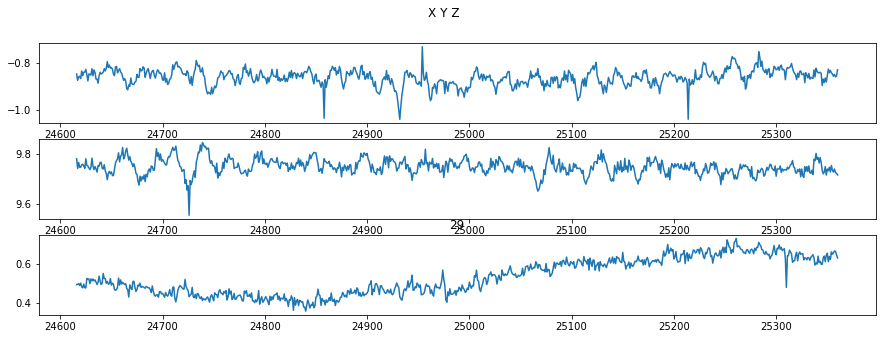

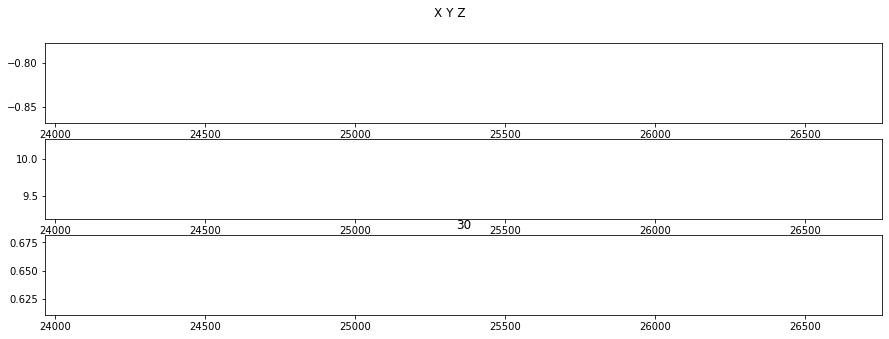

In [ ]:
Plot_data(df)

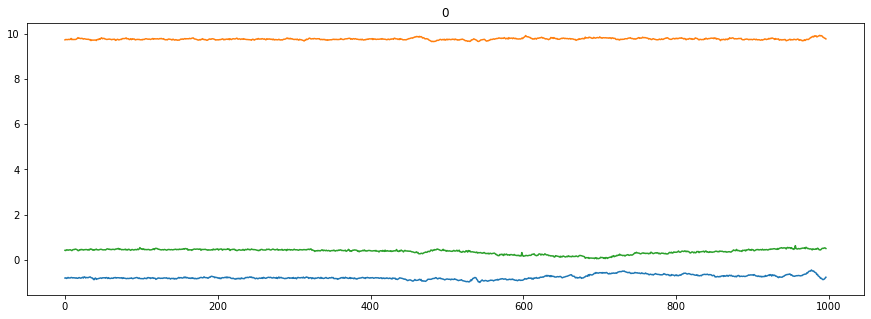

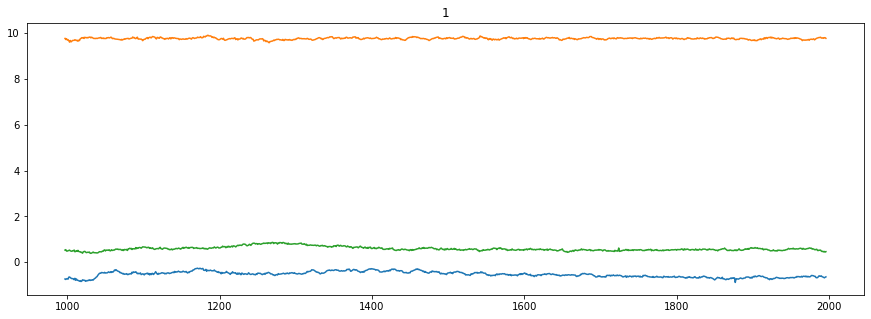

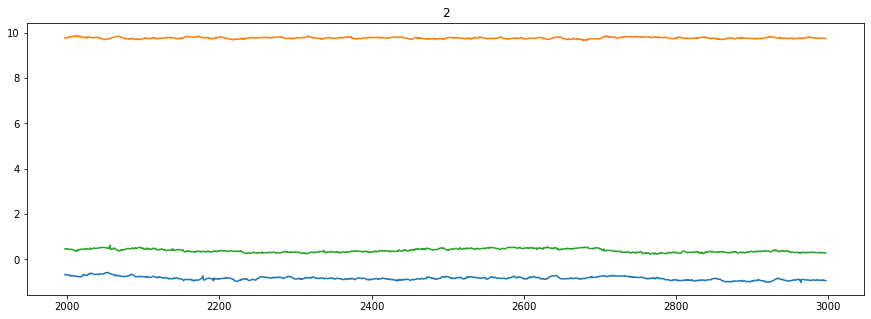

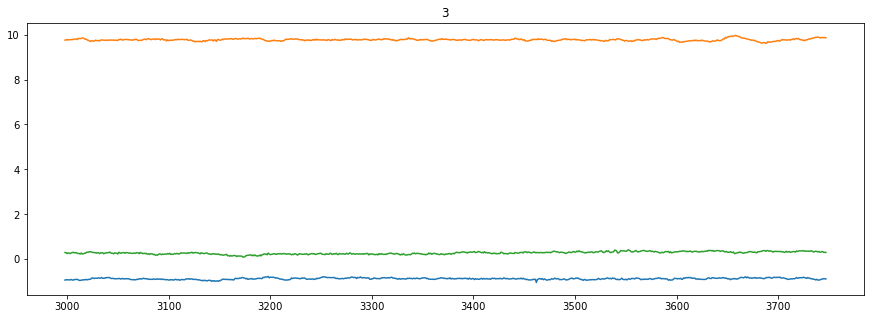

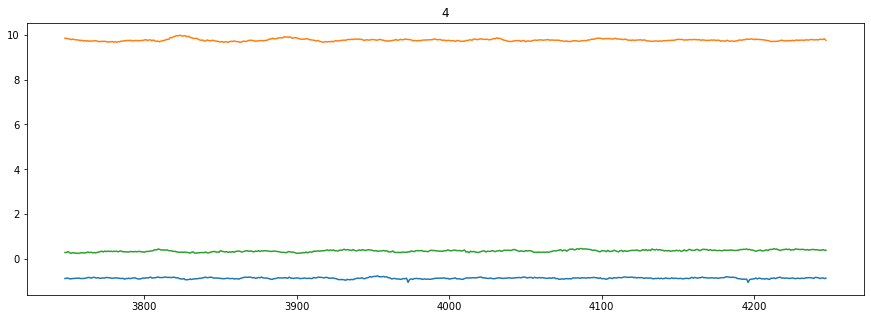

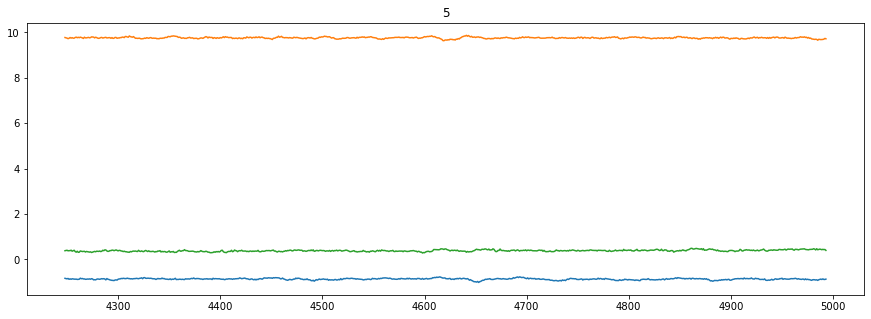

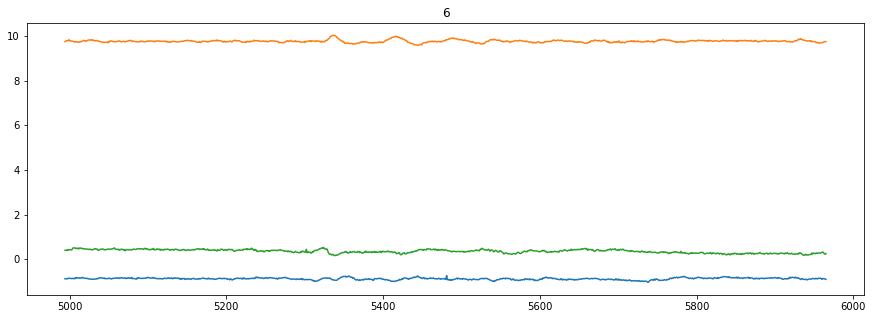

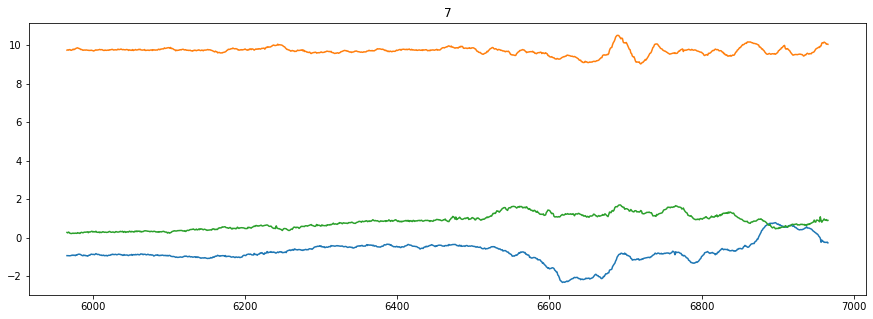

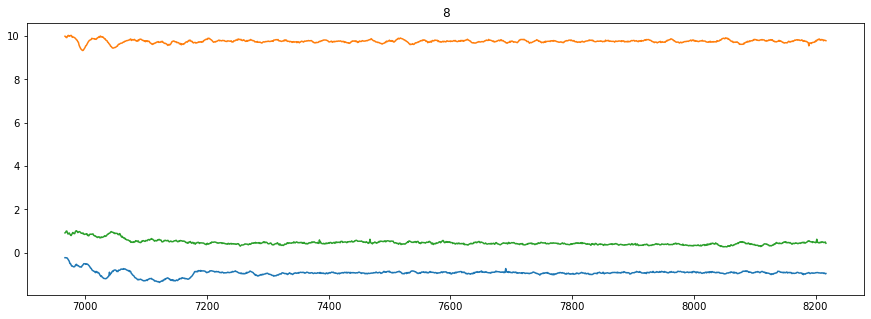

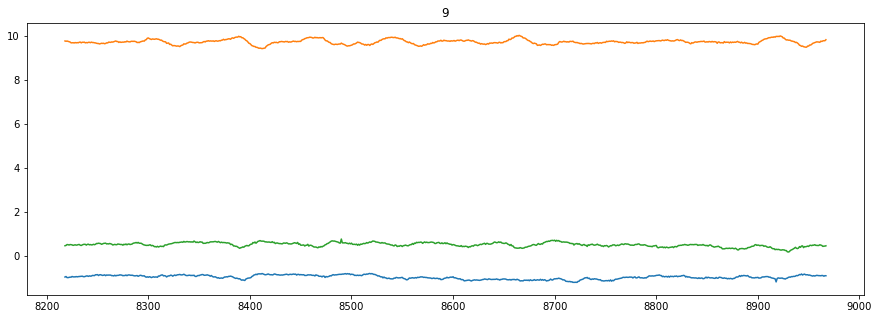

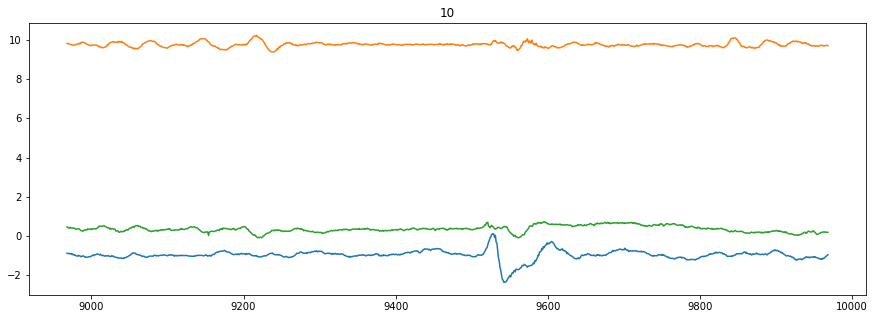

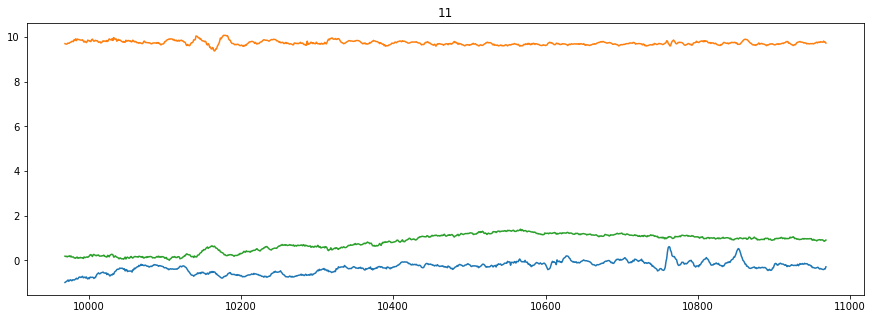

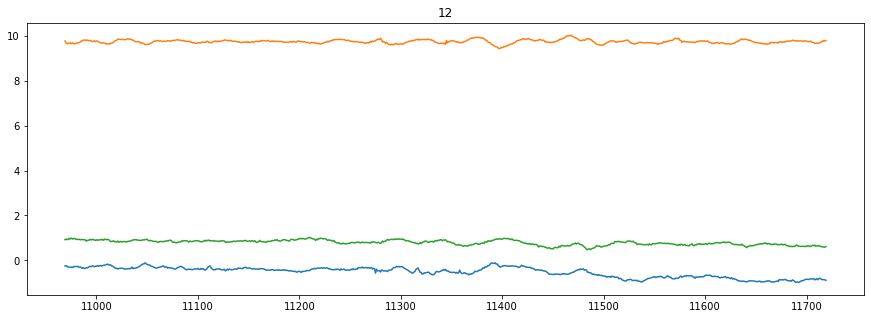

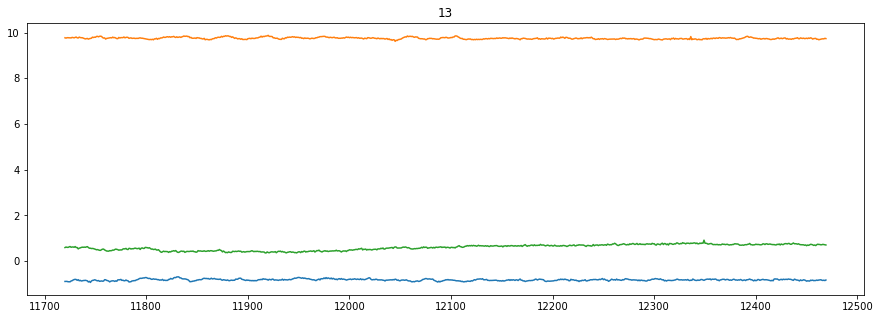

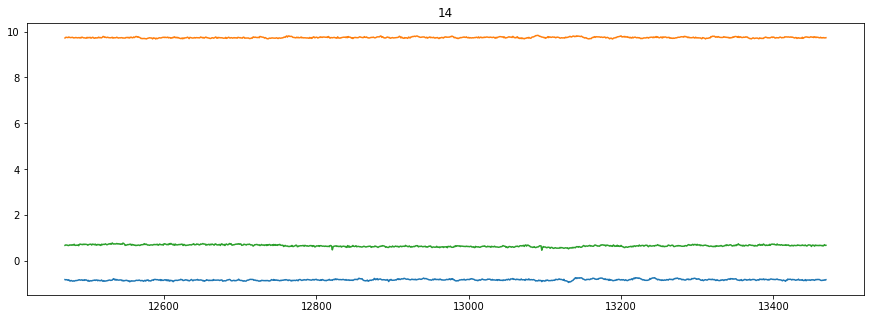

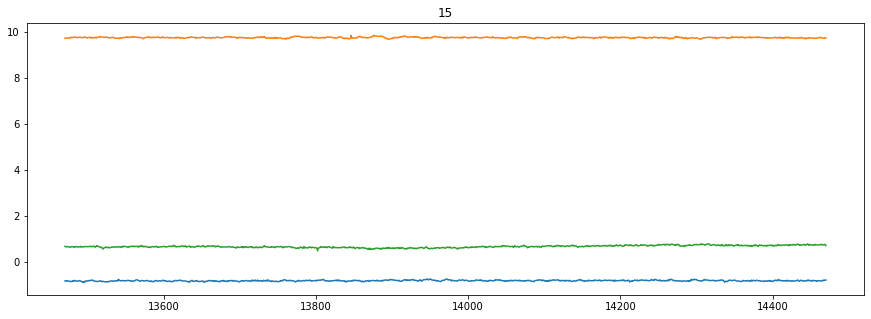

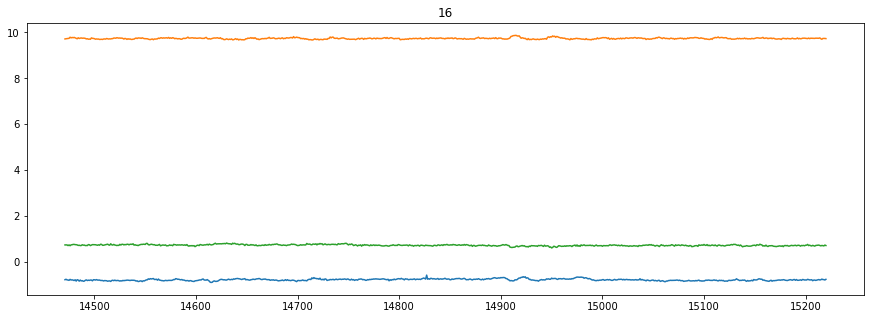

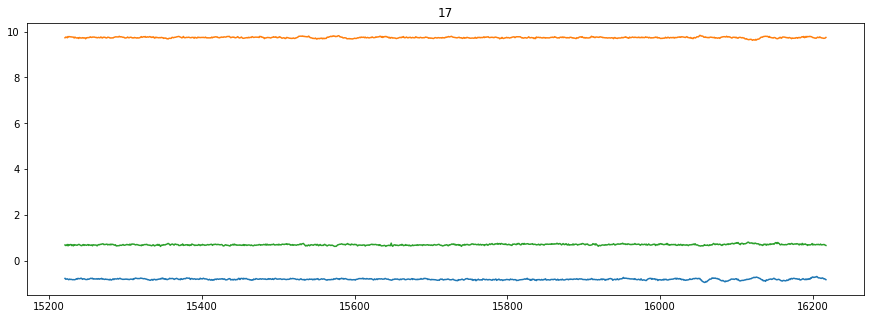

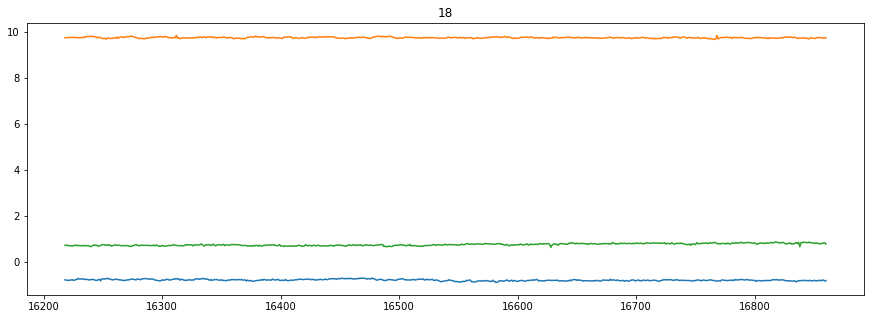

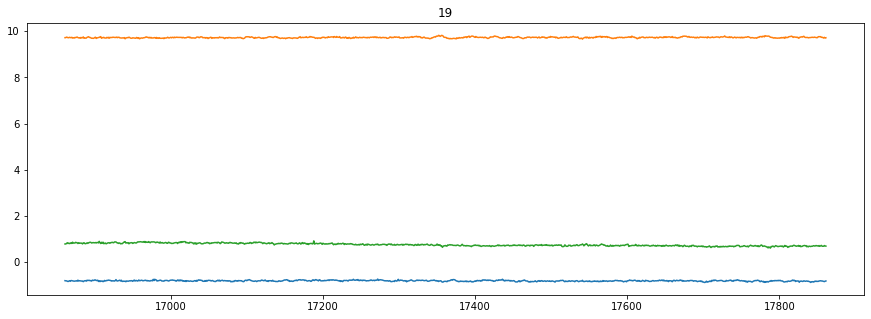

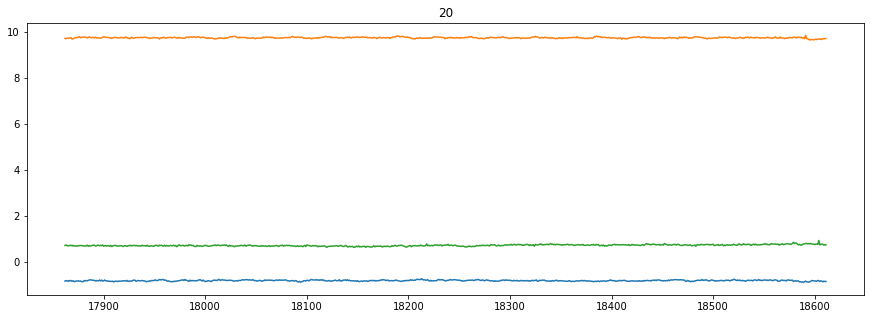

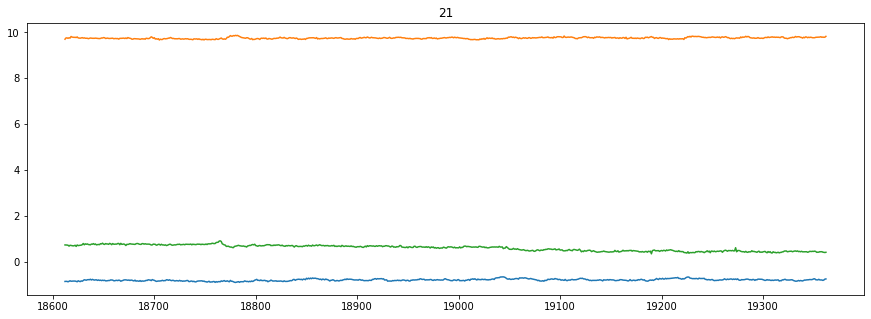

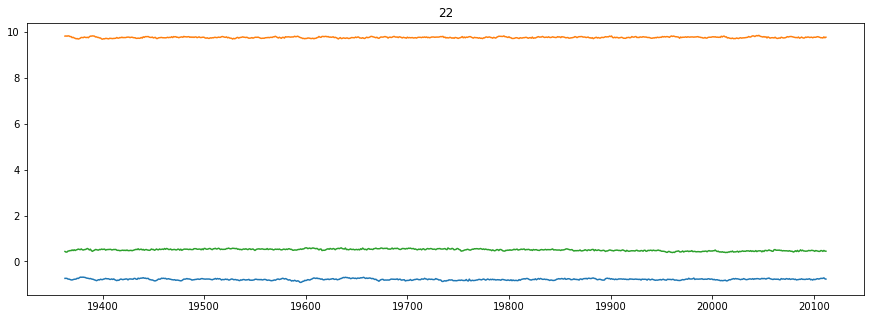

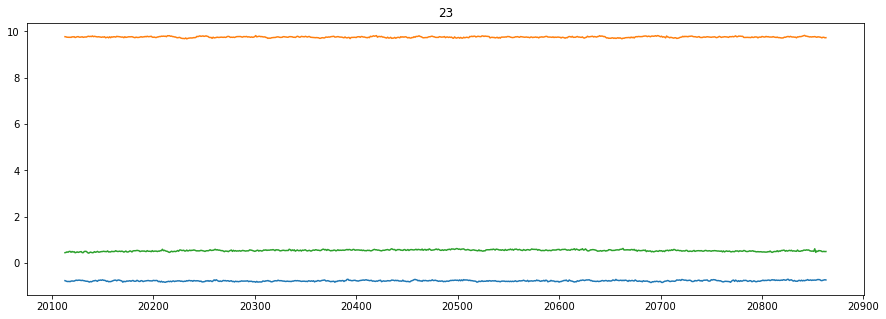

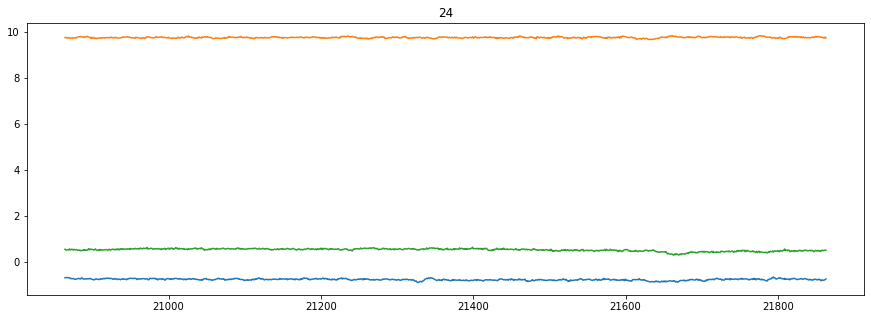

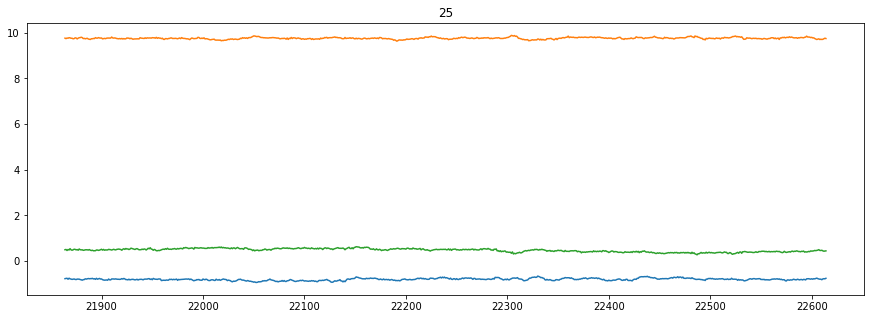

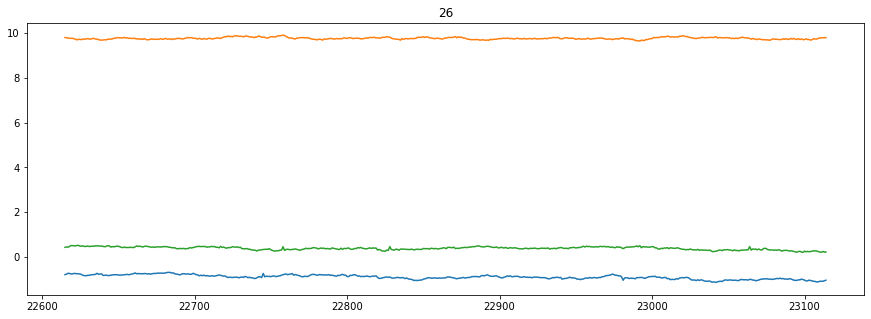

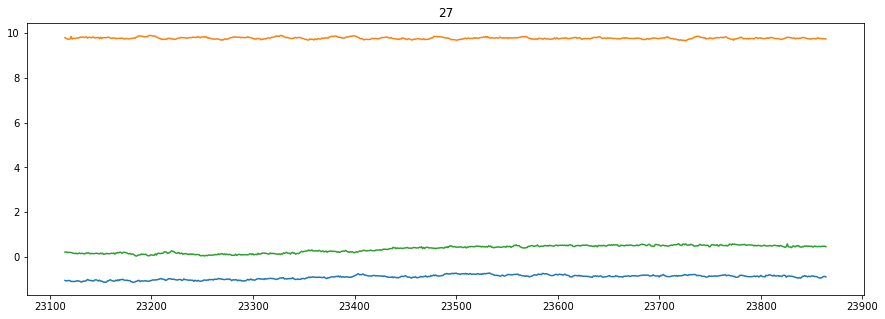

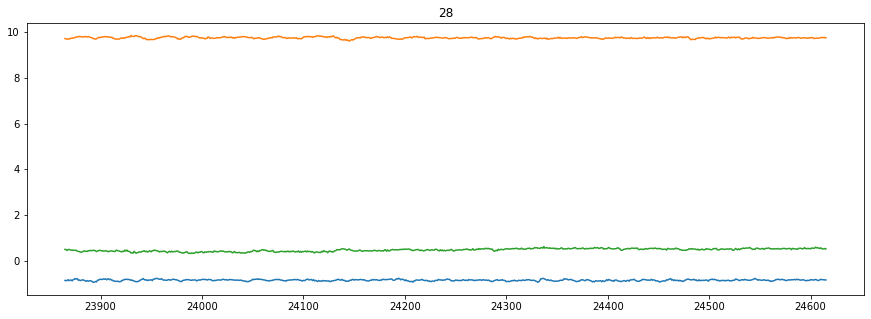

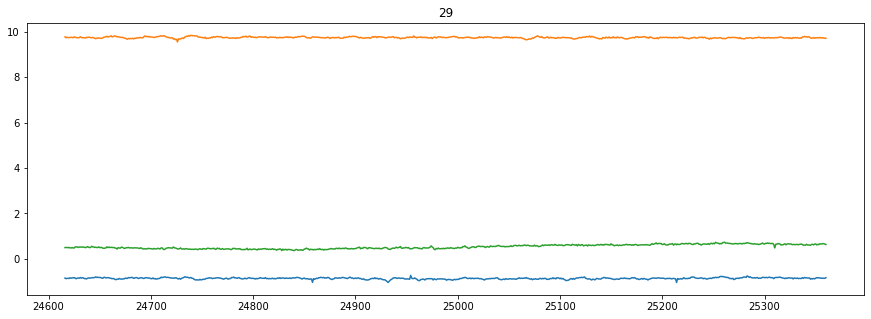

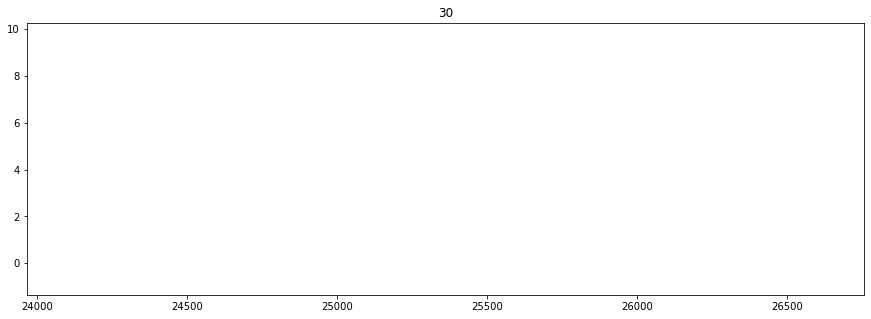

In [ ]:
index_list = df['indexing'].unique().astype(int)
for i in index_list:
    df_temp = df[df['indexing']==i]
    plt.figure(figsize=(15,5))
    plt.plot(df_temp['Torso_Accel_X'])
    plt.plot(df_temp['Torso_Accel_Y'])
    plt.plot(df_temp['Torso_Accel_Z'])
    plt.title(i)
    plt.show()



<AxesSubplot:xlabel='Torso_Accel_X'>

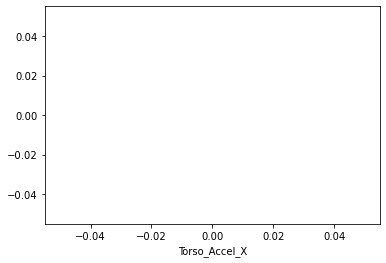

In [ ]:
sns.lineplot(x='Torso_Accel_X', data =df, legend=False)

<function matplotlib.pyplot.show(close=None, block=None)>

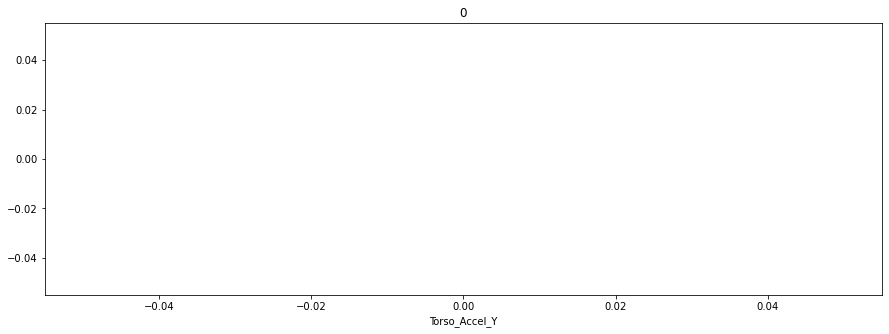

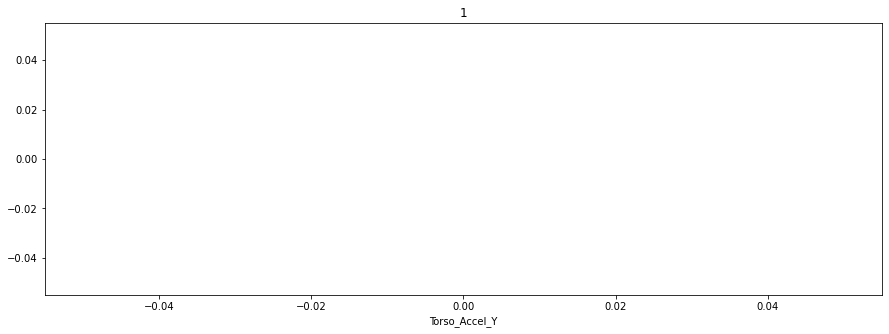

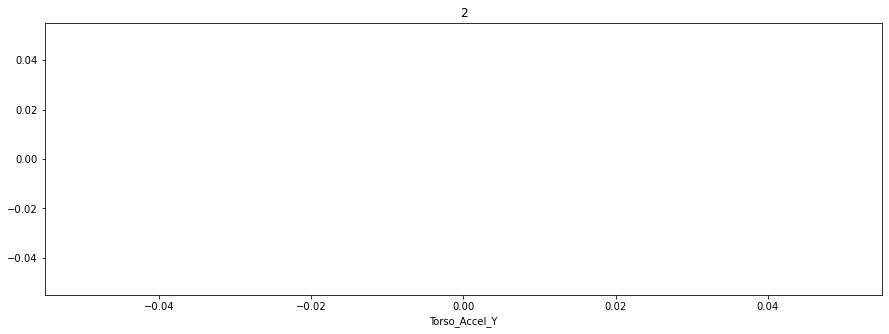

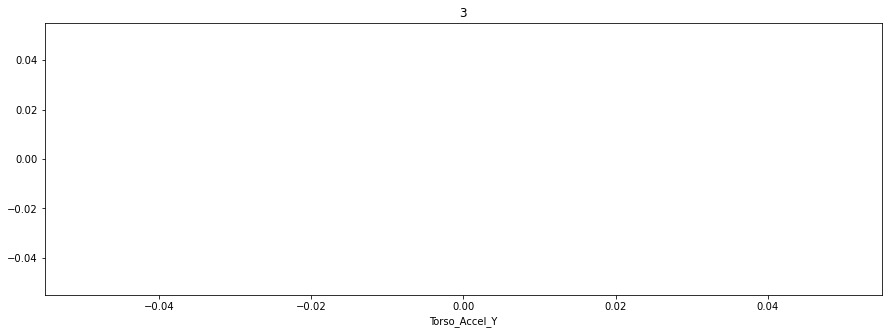

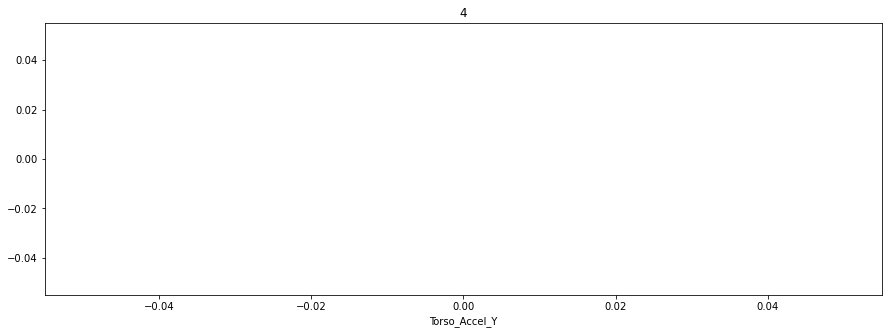

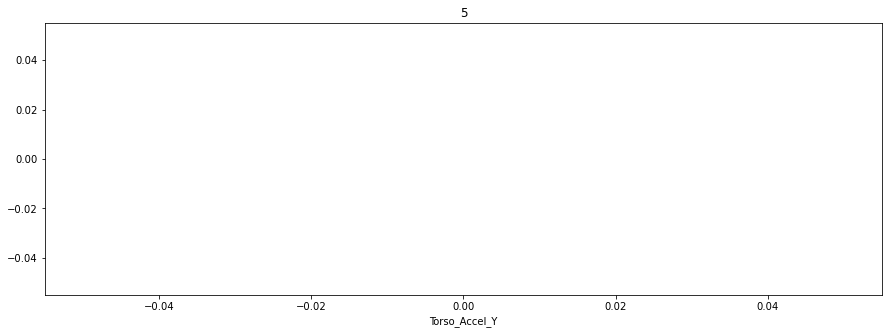

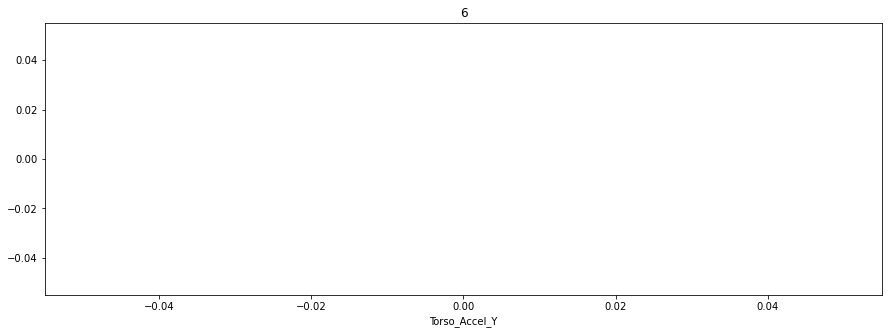

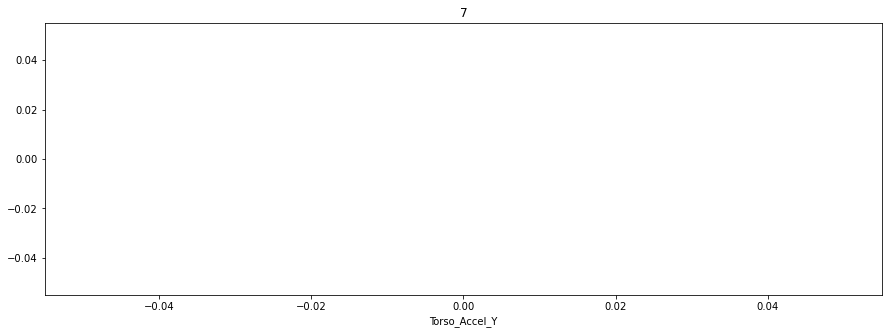

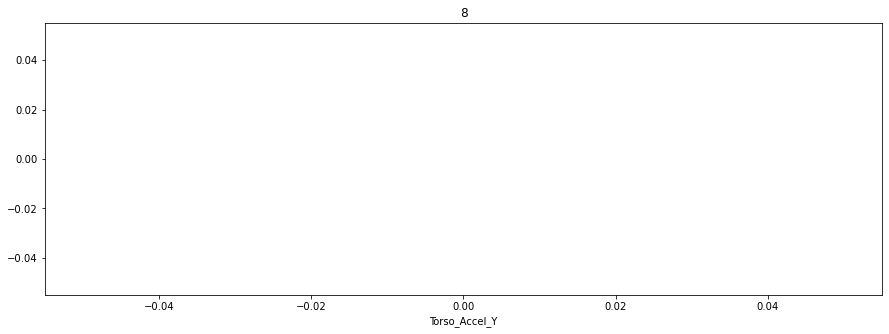

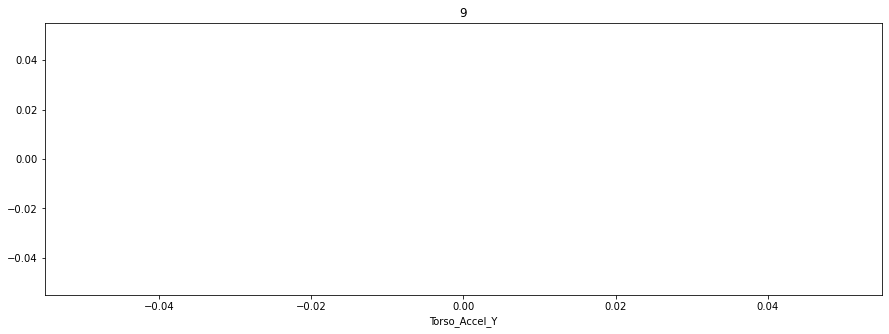

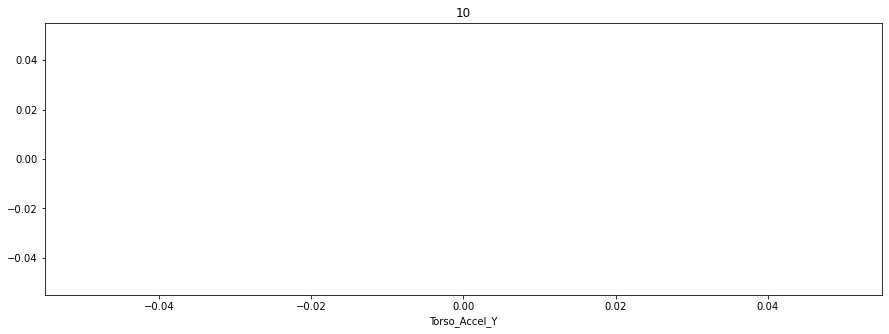

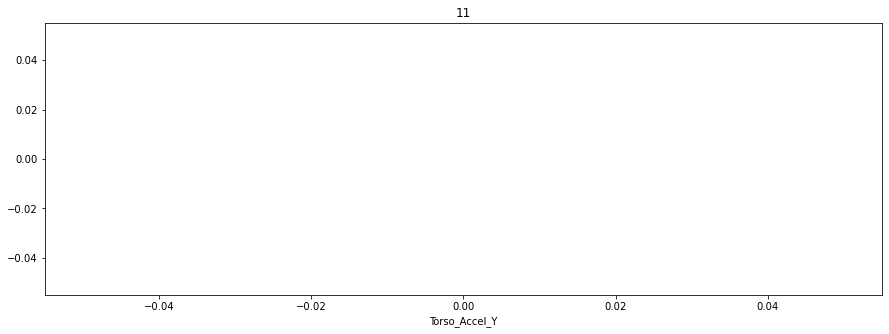

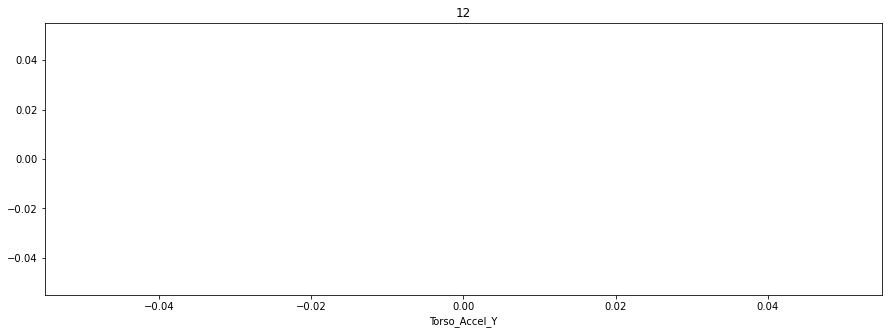

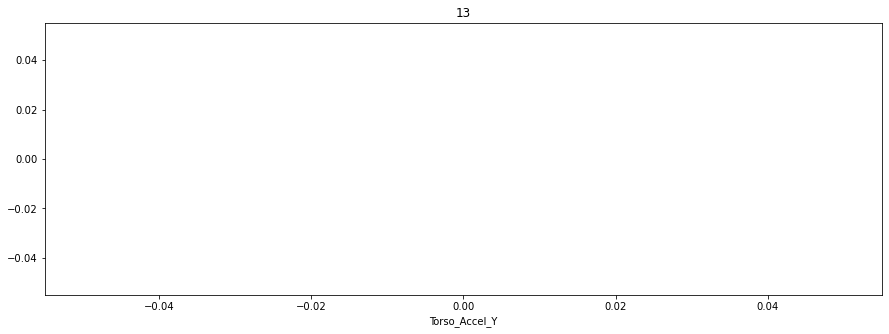

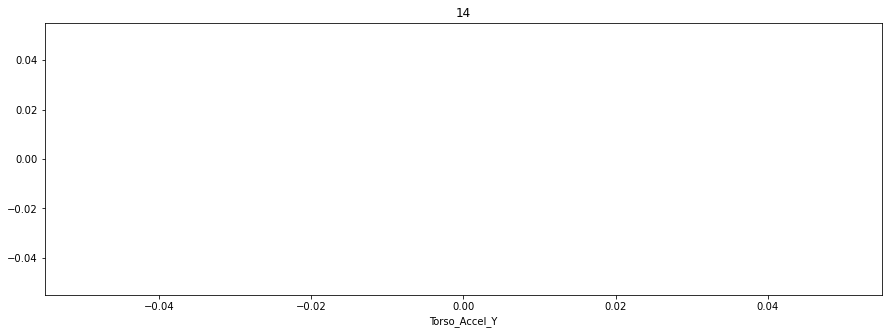

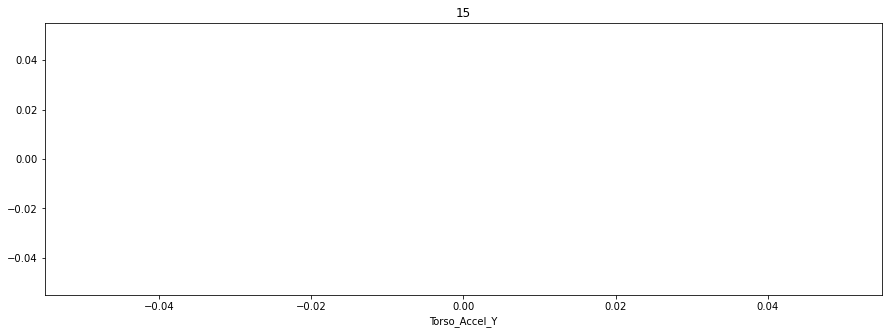

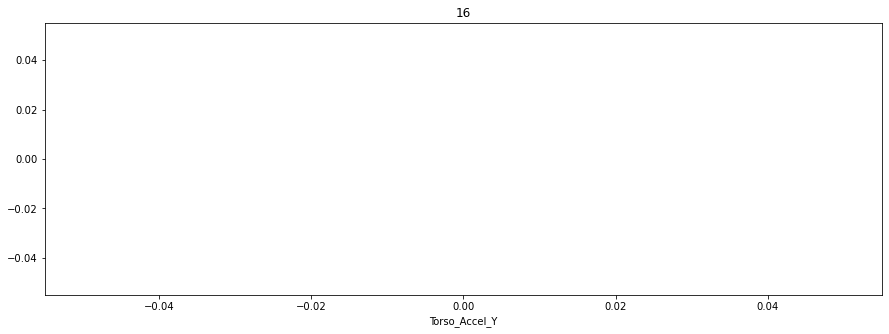

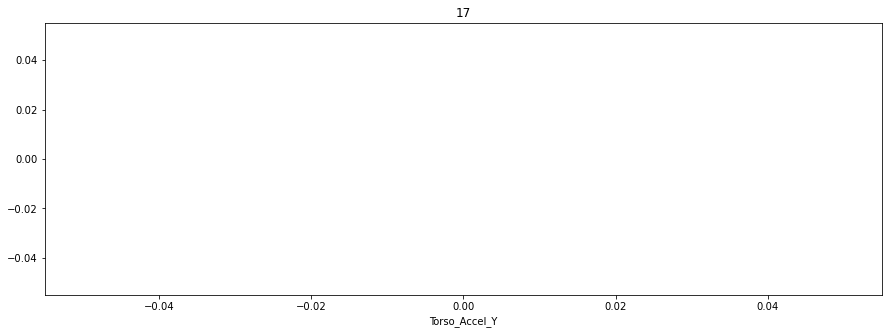

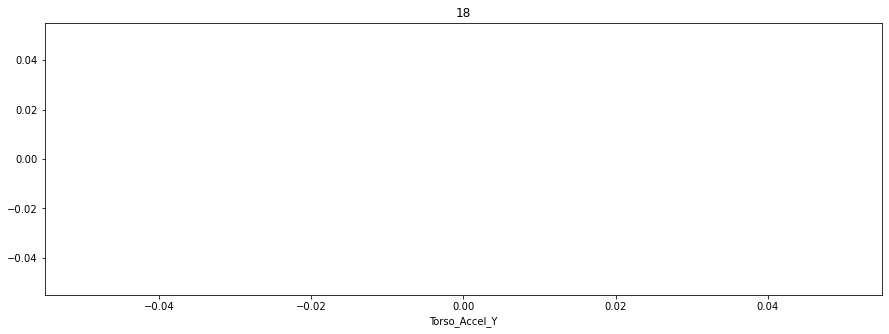

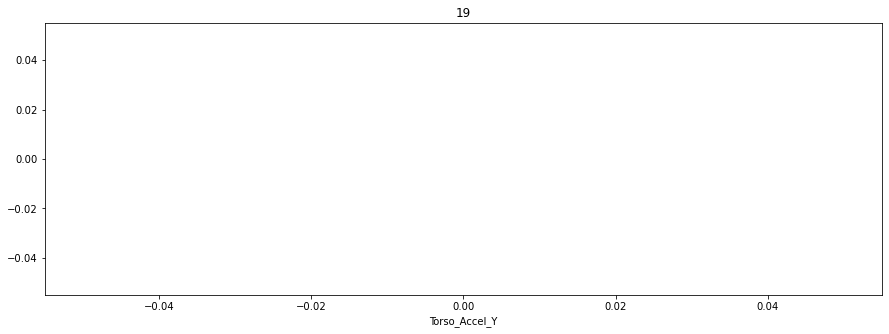

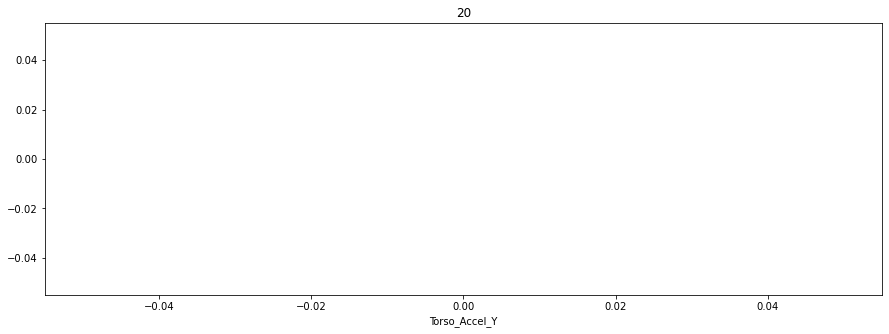

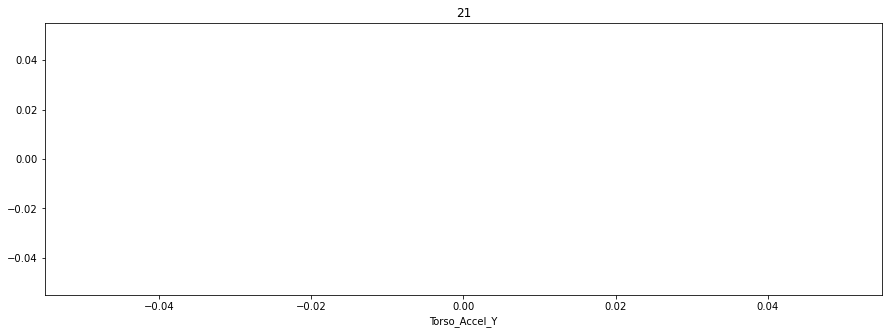

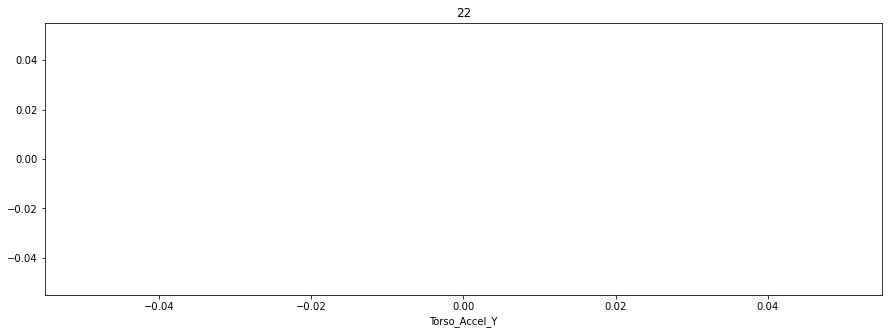

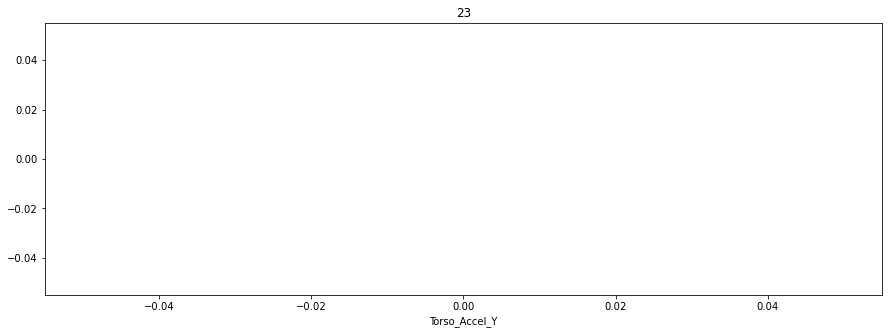

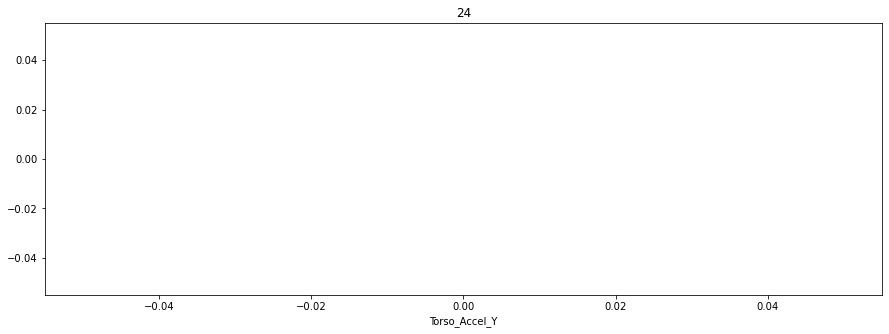

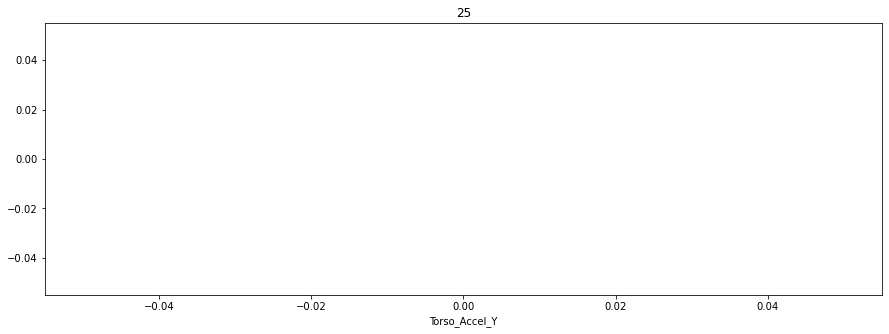

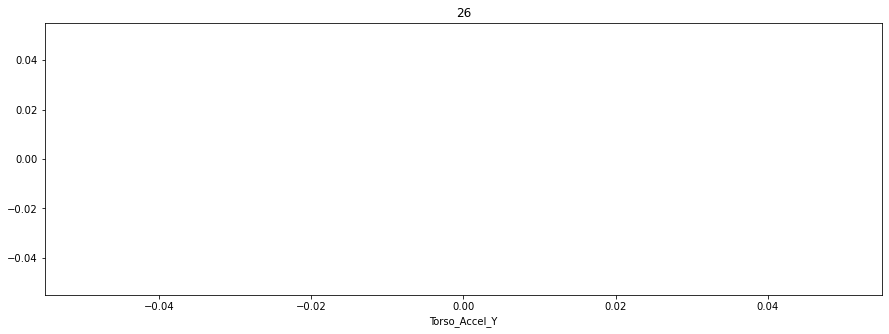

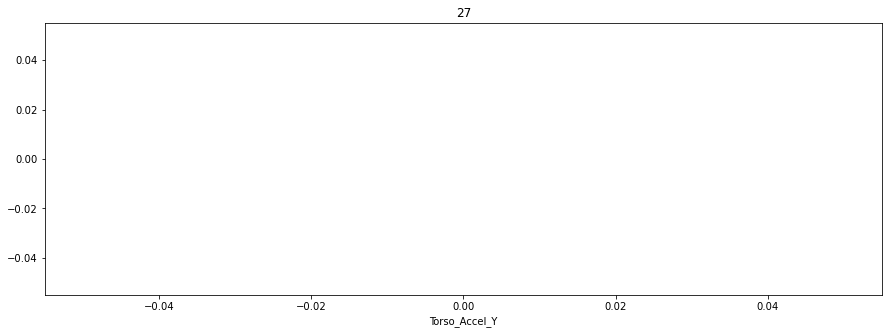

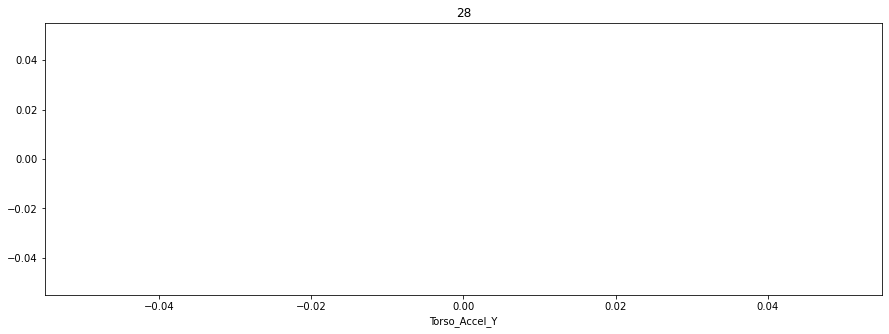

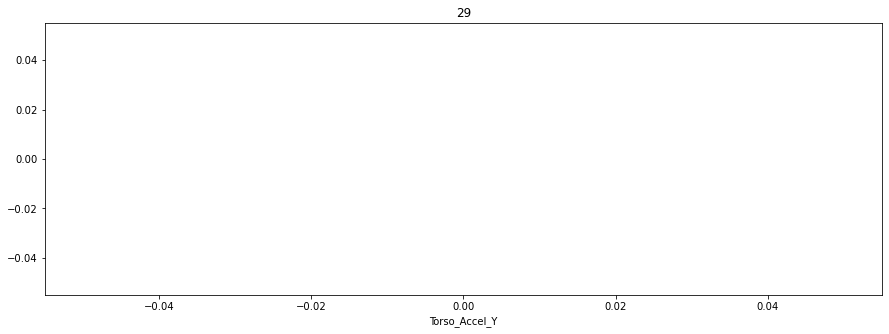

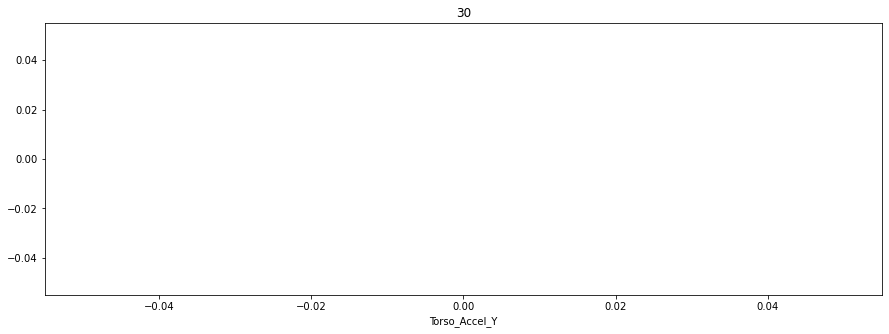

In [ ]:
import seaborn as sns
index_list = df['indexing'].unique().astype(int)
for i in index_list:
    df_temp = df[df['indexing']==i]
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Torso_Accel_X', data =df_temp, legend=False)
    plt.title(i)
plt.show
#sns.lineplot(x='Torso_Accel_X',y='VO2', data =df_temp, legend=True)